TP 4 -  Guadalupe Sosa Ferro y Florencia Denisse Costa

# Install, importar librerías y montar Drive

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
from scipy.stats import kendalltau
warnings.filterwarnings('ignore')
import itertools
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
import plotly.express as px
import pprint

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cargar datos

In [ ]:
datos = pd.read_excel("/content/movie_data.xlsx")
# Se cargan los datos del archivo excel utilizando Pandas
# Se guardan en un DataFrame

In [ ]:
datos

budget     genres    imdb_id        original_title  \
0     30000000.0  Animation  tt0114709             Toy Story   
1     65000000.0  Adventure  tt0113497               Jumanji   
2     16000000.0     Comedy  tt0114885     Waiting to Exhale   
3     60000000.0     Action  tt0113277                  Heat   
4     35000000.0     Action  tt0114576          Sudden Death   
...          ...        ...        ...                   ...   
5500  40000000.0      Crime  tt0117913        A Time to Kill   
5501  25000000.0     Action  tt0116320                  Fled   
5502  13000000.0    Fantasy  tt0116707       Joe's Apartment   
5503  26000000.0     Comedy  tt0116313  The First Wives Club   
5504  80000000.0     Action  tt0117438                Ransom   

                                               overview  popularity  \
0     Led by Woody, Andy's toys live happily in his ...   21.946943   
1     When siblings Judy and Peter discover an encha...   17.015539   
2     Cheated on, mistreated and stepped on, the wom...    3.859495   
3     Obsessive master thief, Neil McCauley leads a ...   17.924927   
4     International action superstar Jean Claude Van...    5.231580   
...                                                 ...         ...   
5500  A young lawyer defends a black man accused of ...   13.309013   
5501  During a routine prison work detail, convict P...    3.906949   
5502  A nice guy has just moved to New York and disc...    9.490858   
5503  After years of helping their hubbies climb the...         NaN   
5504  When a rich man's son is kidnapped, he coopera...    8.772188   

      production_companies  production_countries release_date      revenue  \
0                      1.0                   1.0   1995-10-30  373554033.0   
1                      3.0                   1.0   1995-12-15  262797249.0   
2                      1.0                   1.0   1995-12-22   81452156.0   
3                      3.0                   1.0   1995-12-15  187436818.0   
4                      3.0                   1.0   1995-12-22   64350171.0   
...                    ...                   ...          ...          ...   
5500                   2.0                   1.0   1996-07-24  152266007.0   
5501                   1.0                   1.0   1996-07-19   17193231.0   
5502                   0.0                   1.0   1996-07-26    4619014.0   
5503                   1.0                   1.0   1996-09-20  116400000.0   
5504                   2.0                   1.0   1996-11-08  309492681.0   

      runtime  spoken_languages  vote_average  vote_count  
0        81.0               1.0           7.7      5415.0  
1       104.0               2.0           6.9      2413.0  
2       127.0               1.0           6.1        34.0  
3       170.0               2.0           7.7      1886.0  
4       106.0               1.0           5.5       174.0  
...       ...               ...           ...         ...  
5500    149.0               1.0           7.0       522.0  
5501      NaN               1.0           5.2        49.0  
5502     78.0               1.0           5.0        87.0  
5503    102.0               1.0           6.5       172.0  
5504    117.0               1.0           6.4       482.0  

[5505 rows x 14 columns]

# Limpiar datos

In [ ]:
datos_1 = datos.drop(['imdb_id'], axis=1)

# Eliminamos las filas que tengan datos faltantes
datos_2 = datos_1.dropna()
print(len(datos_2)) # Quedan 5029 registros

5029


In [ ]:
df_sin_duplicados = datos_2.drop_duplicates().reset_index(drop=True)
print(len(df_sin_duplicados))

4789


# Discretizar original_title y overview

In [ ]:
def contarPalabras(datos, variable, nueva_columna):
  lista_valores = []
  for i in range(len(datos)):
    registro = datos.iloc[i]
    titulo = str(registro.loc[variable])
    len_titulo = len(titulo.split())
    lista_valores.append(len_titulo)
  datos_new = datos
  datos_new[nueva_columna] = lista_valores
  return datos_new

In [ ]:
datos_3 = contarPalabras(df_sin_duplicados, "original_title", "original_title_wordcount")
datos_4 = contarPalabras(df_sin_duplicados, "overview", "overview_wordcount")

In [ ]:
datos_5 = datos_4
datos_5['release_date'] = pd.to_datetime(datos_5['release_date'])

In [ ]:
datos_5.loc[:,"release_date"]

0      1995-10-30
1      1995-12-15
2      1995-12-22
3      1995-12-15
4      1995-12-22
          ...    
4784   2017-08-03
4785   2007-06-14
4786   2006-11-23
4787   2010-09-30
4788   2007-09-06
Name: release_date, Length: 4789, dtype: datetime64[ns]

In [ ]:
datos_5['date_category'] = pd.cut(datos_5['release_date'],
                             bins=pd.date_range(start='1914-12-31	',
                                                end='2035-01-01', freq='30Y', inclusive="both"), labels = ["1", "2", "3", "4"])

In [ ]:
datos_5[['release_date','date_category']].sort_values("release_date")

release_date date_category
1951   1915-02-08             1
2183   1915-12-13             1
2932   1916-12-24             1
4439   1918-08-01             1
1076   1921-01-21             1
...           ...           ...
4773   2017-07-26             4
4783   2017-07-28             4
4782   2017-08-03             4
4784   2017-08-03             4
4766   2017-08-04             4

[4789 rows x 2 columns]

# Ítem a: Análisis univariado

In [ ]:
datos_2.columns

Index(['budget', 'genres', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
# Variables numéricas: budget, popularity, production_companies, production_countries, revenue, runtime, spoken_languages,
# vote_average, vote_count, original_title_wordcount, overview_wordcount,

var_num = ["budget", "popularity", "production_companies", "production_countries", "revenue", "runtime", "spoken_languages",
           "vote_average", "vote_count", "original_title_wordcount", "overview_wordcount"]
var_cat = ["date_category"]

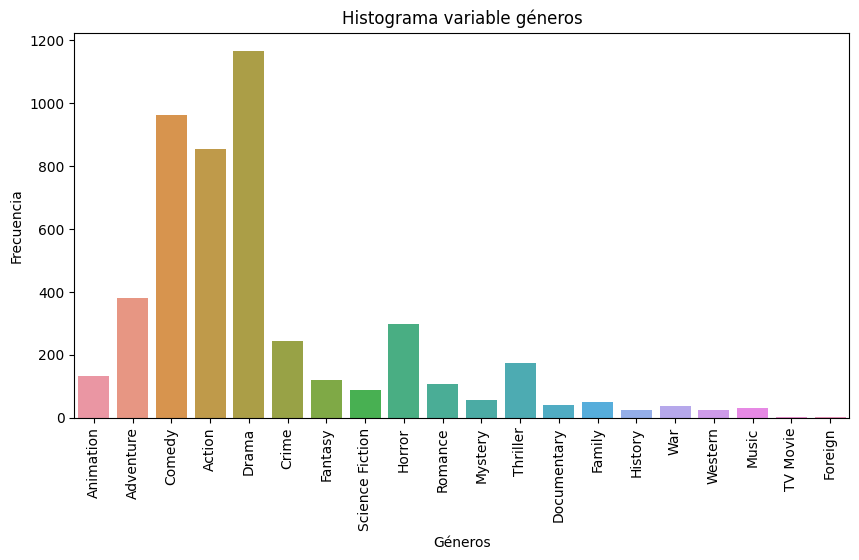

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=datos_5, x="genres")
plt.title("Histograma variable géneros")
plt.xlabel("Géneros")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
def analisisUnivariadoNum(datos, variable):
  # Graficos

  # Crear la figura y los subplots
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

  # Histograma
  sns.barplot(data=datos, x="genres", y=variable, errorbar=None, palette='Set2', ax=ax1)
  ax1.set_title(f'{variable} por género')
  ax1.set_xlabel("géneros")
  ax1.set_ylabel(f"{variable}")
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

  # Swarm Plot
  sns.swarmplot(data=datos, x="genres", y=variable, palette='Set2', ax=ax2)
  ax2.set_title(f'Swarmplot {variable} por género')
  ax2.set_xlabel("géneros")
  ax2.set_ylabel(f"{variable}")
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

  # Ajustar la disposición de los subplots
  plt.tight_layout()

  # Mostrar el gráfico
  plt.show()

  # Describe
  correlacion, p_valor = kendalltau(datos['genres'], datos[variable])
  print(correlacion)

  return

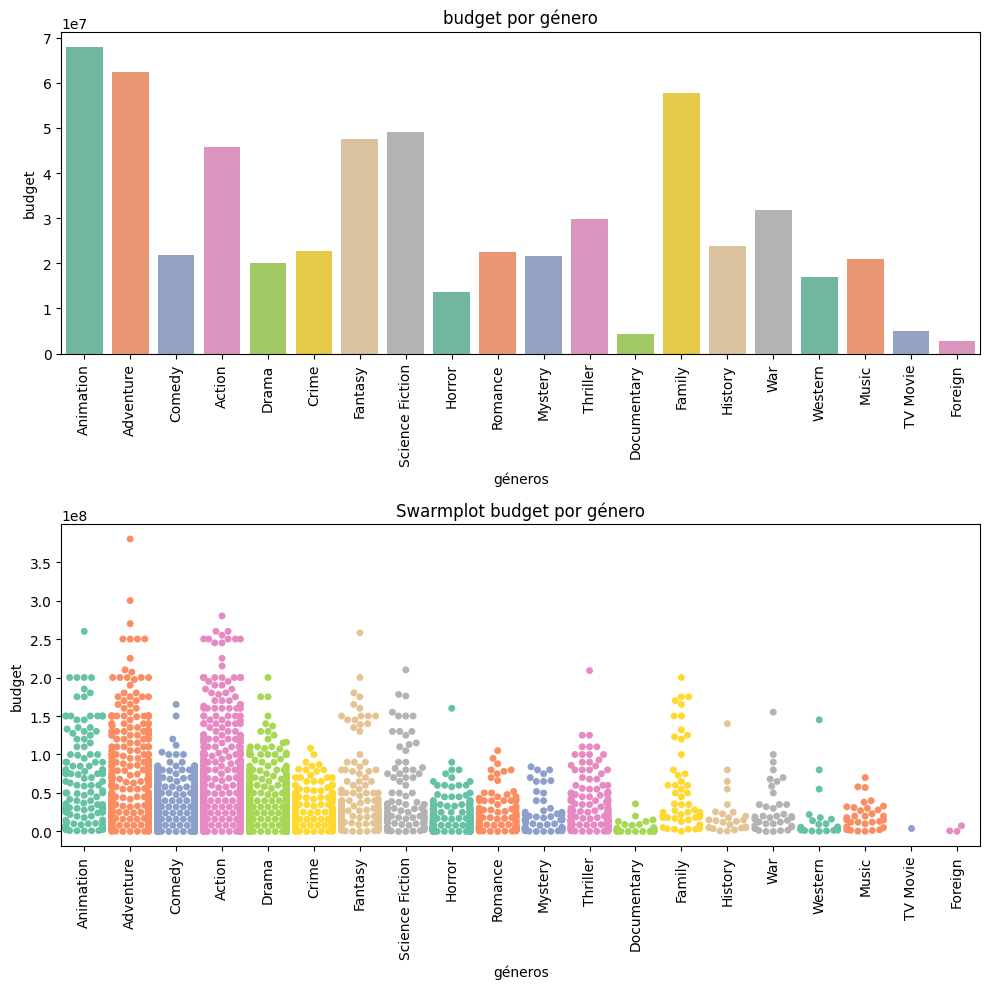

-0.1522979026101634


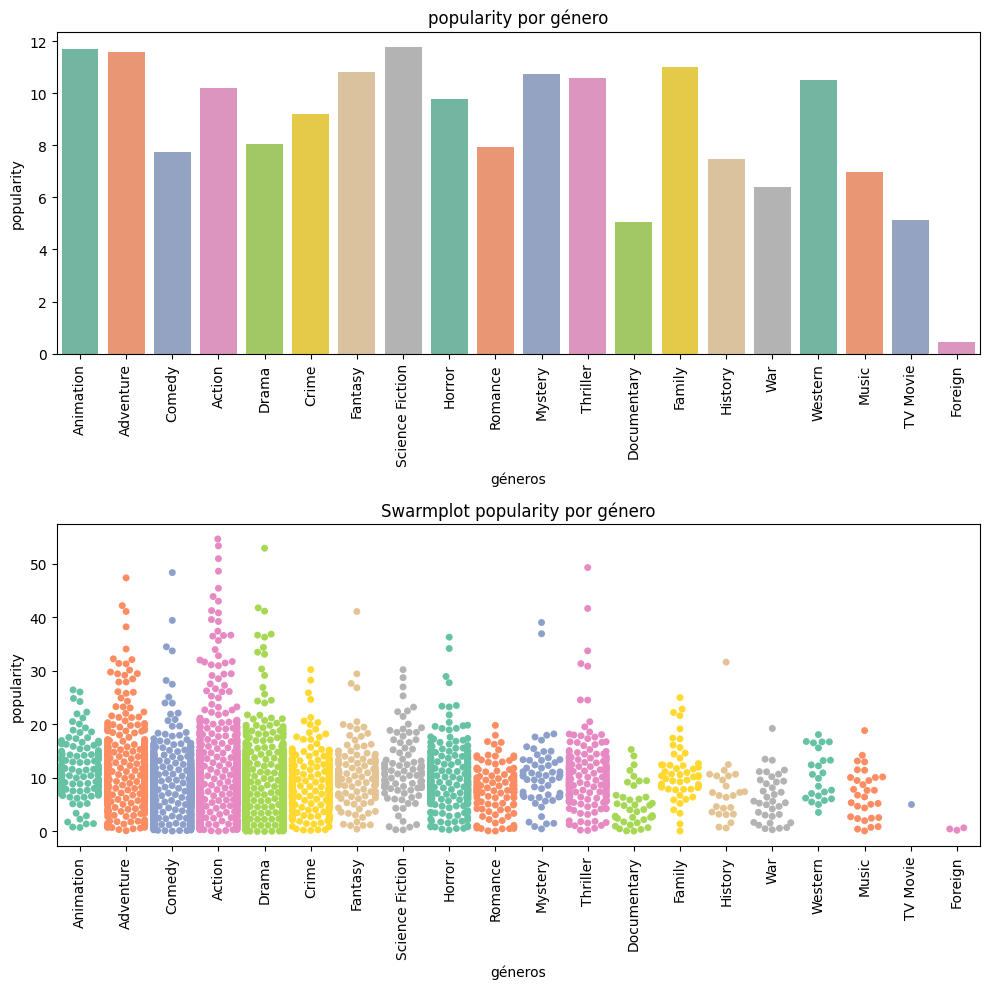

-0.028838520413128742


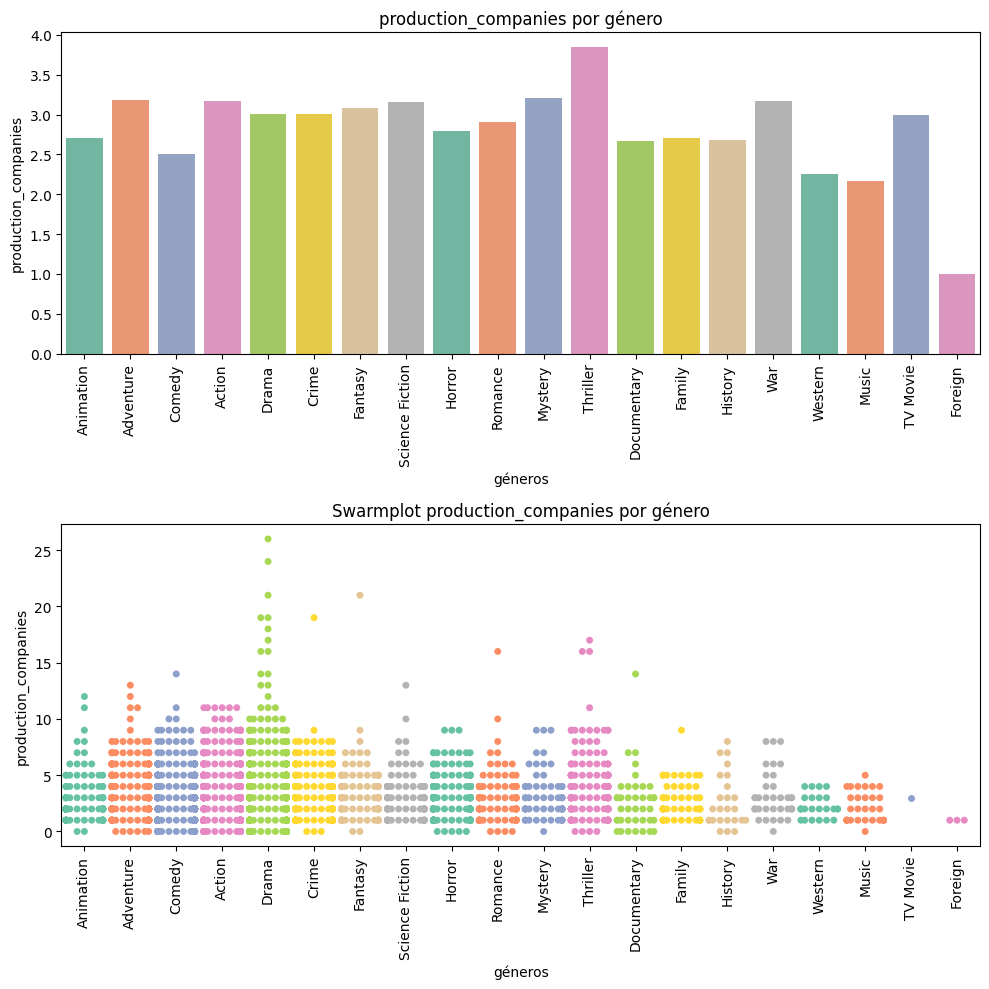

-0.005293197027933322


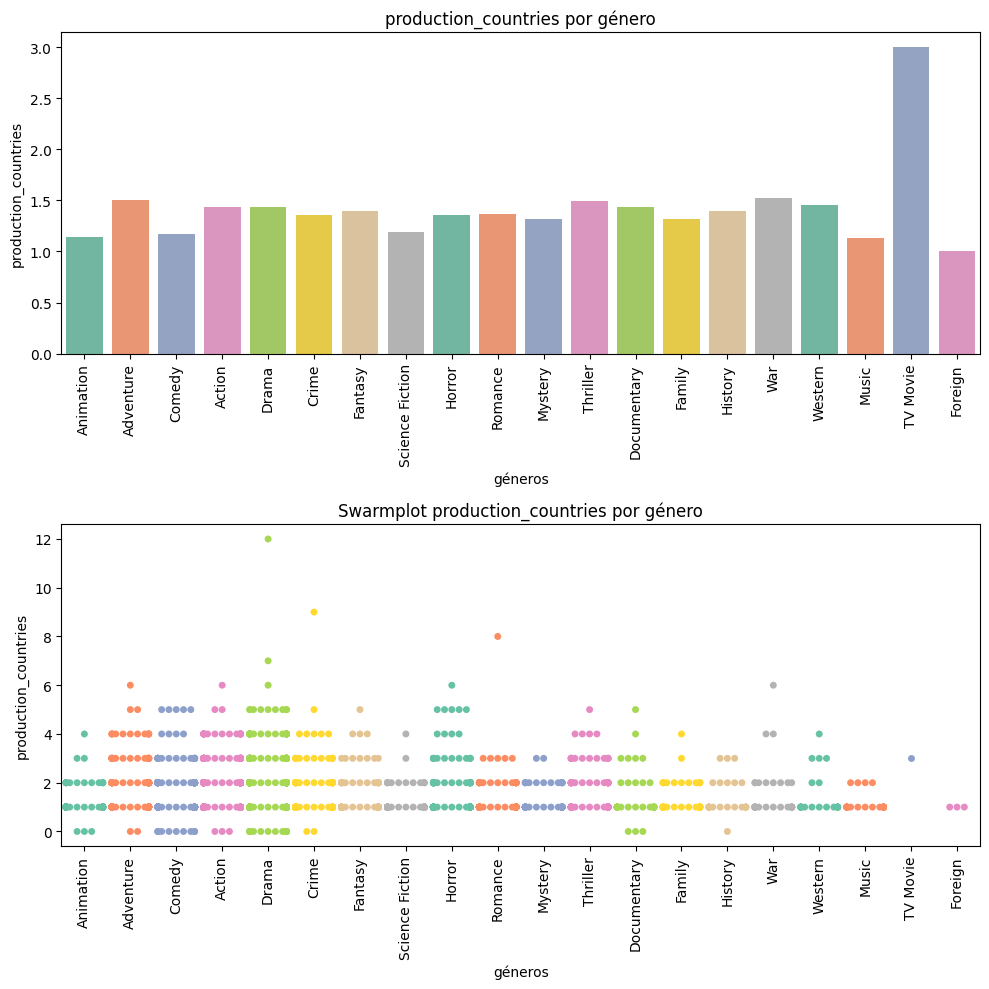

-0.007272806232718017


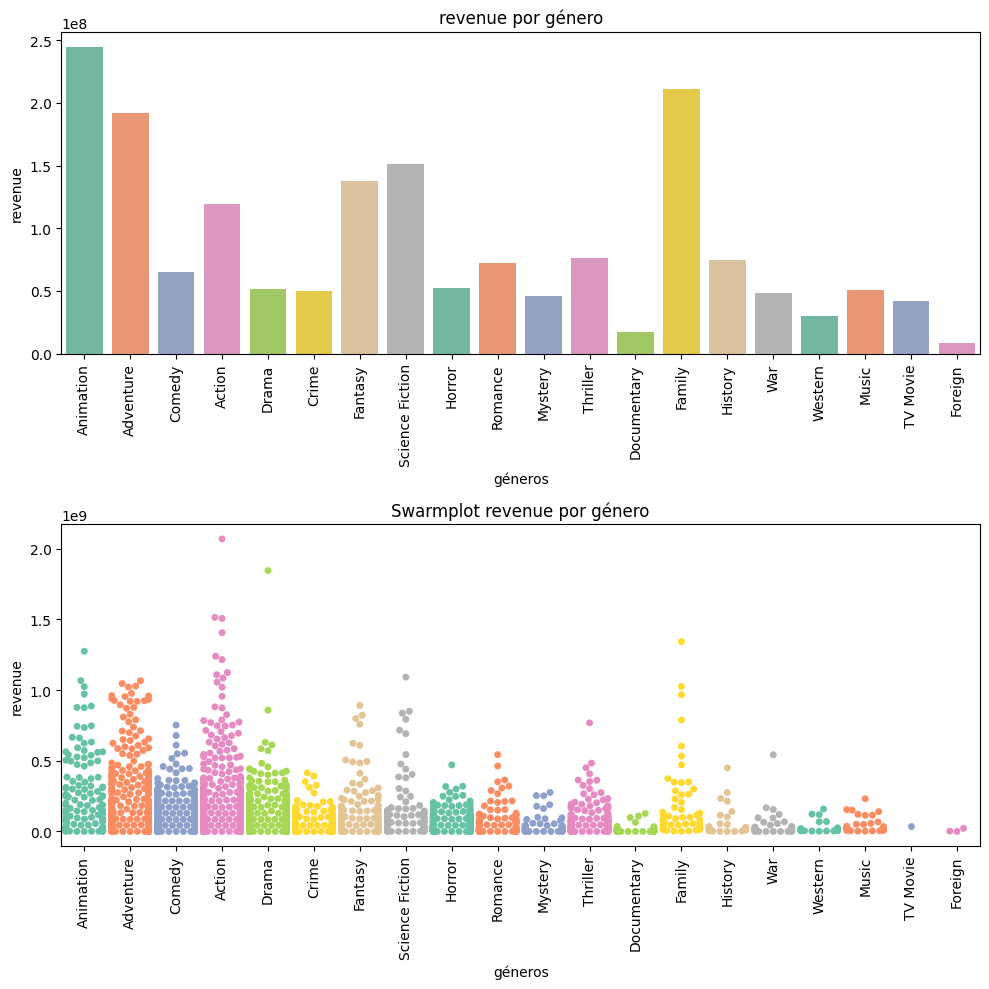

-0.09991130166815416


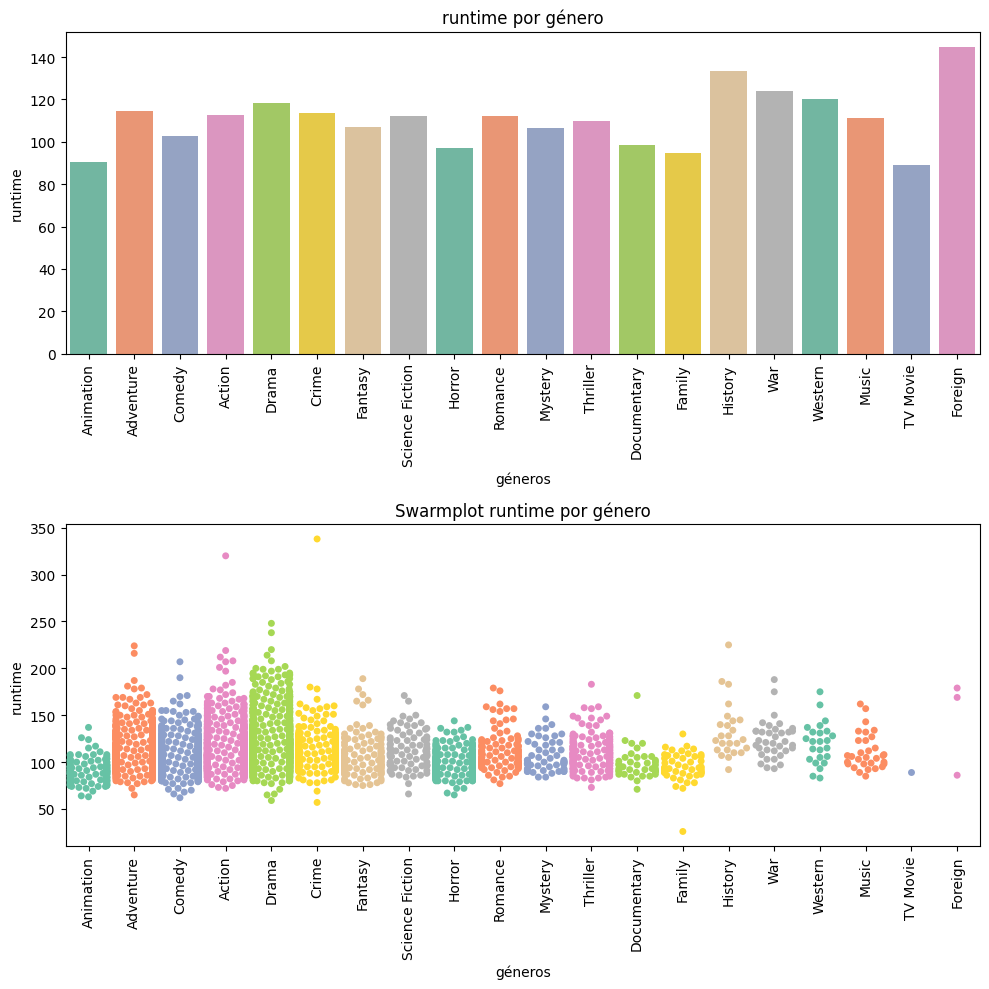

0.015753424129641074


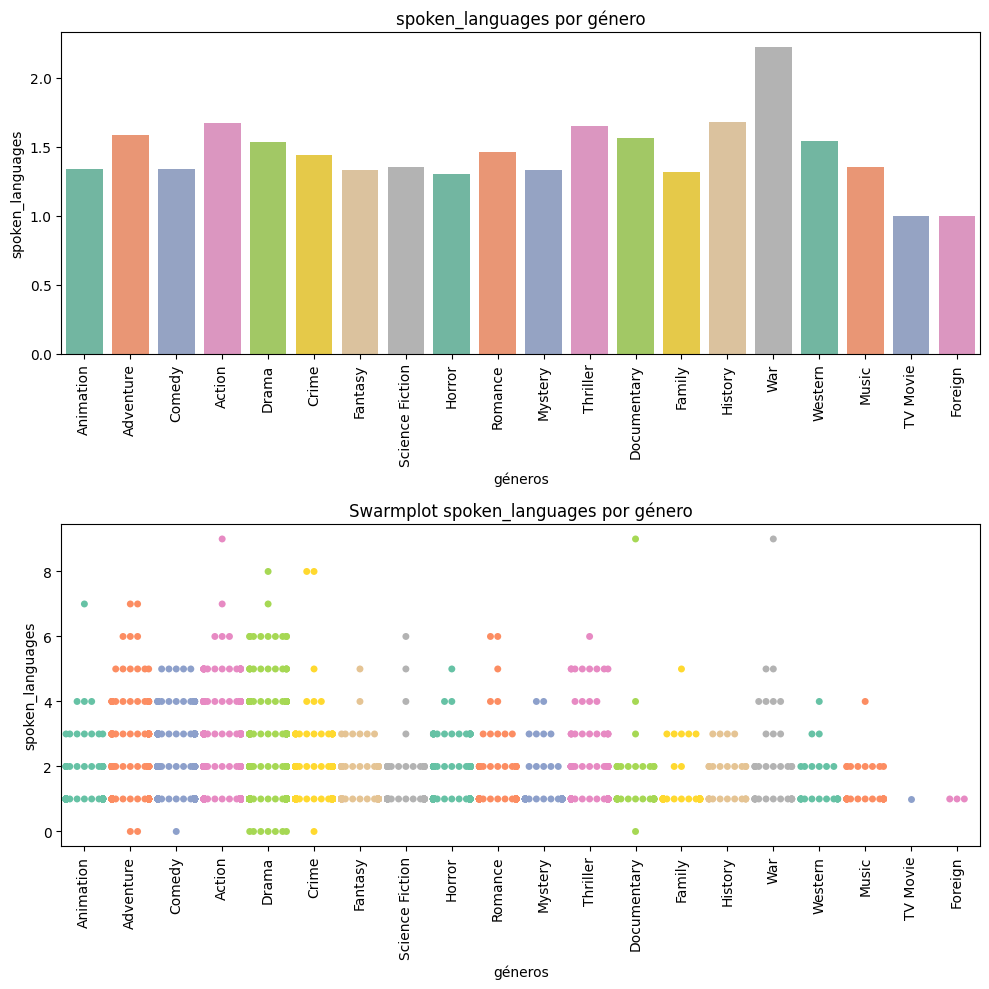

-0.037314239947551224


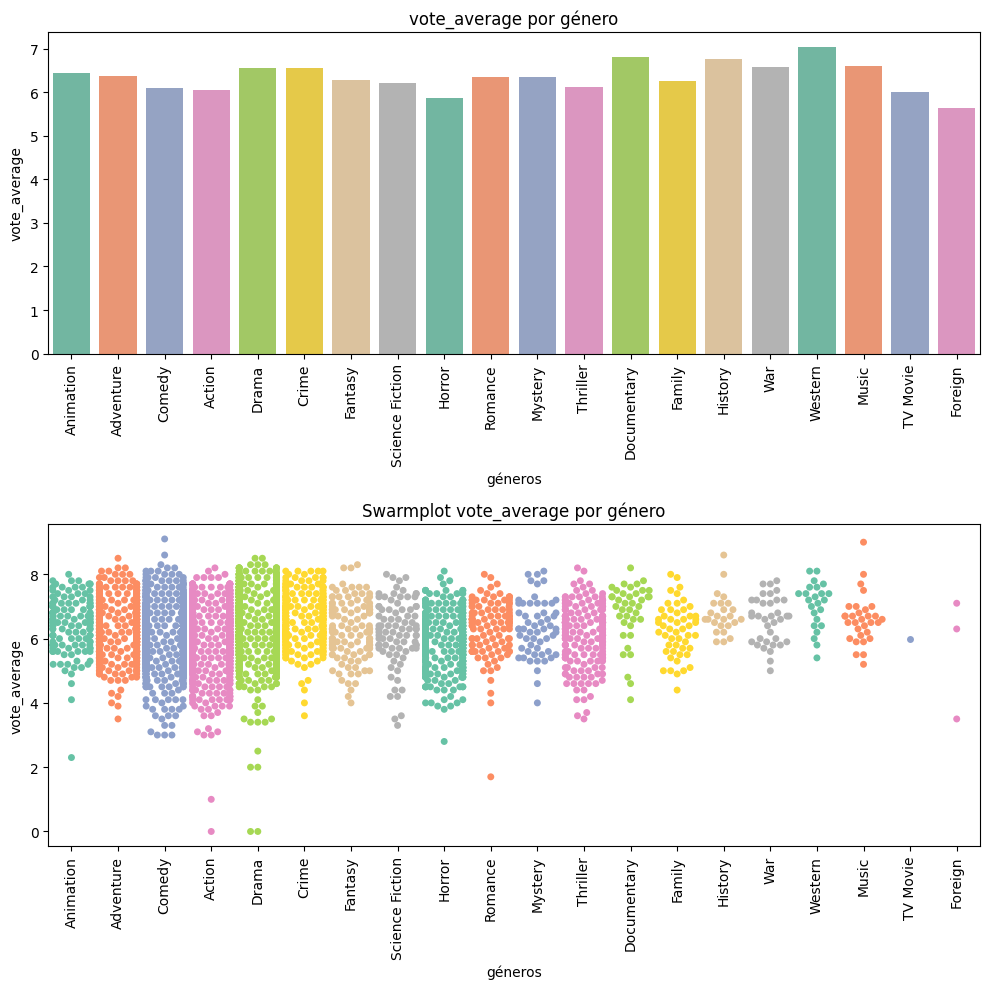

0.06788215398053436


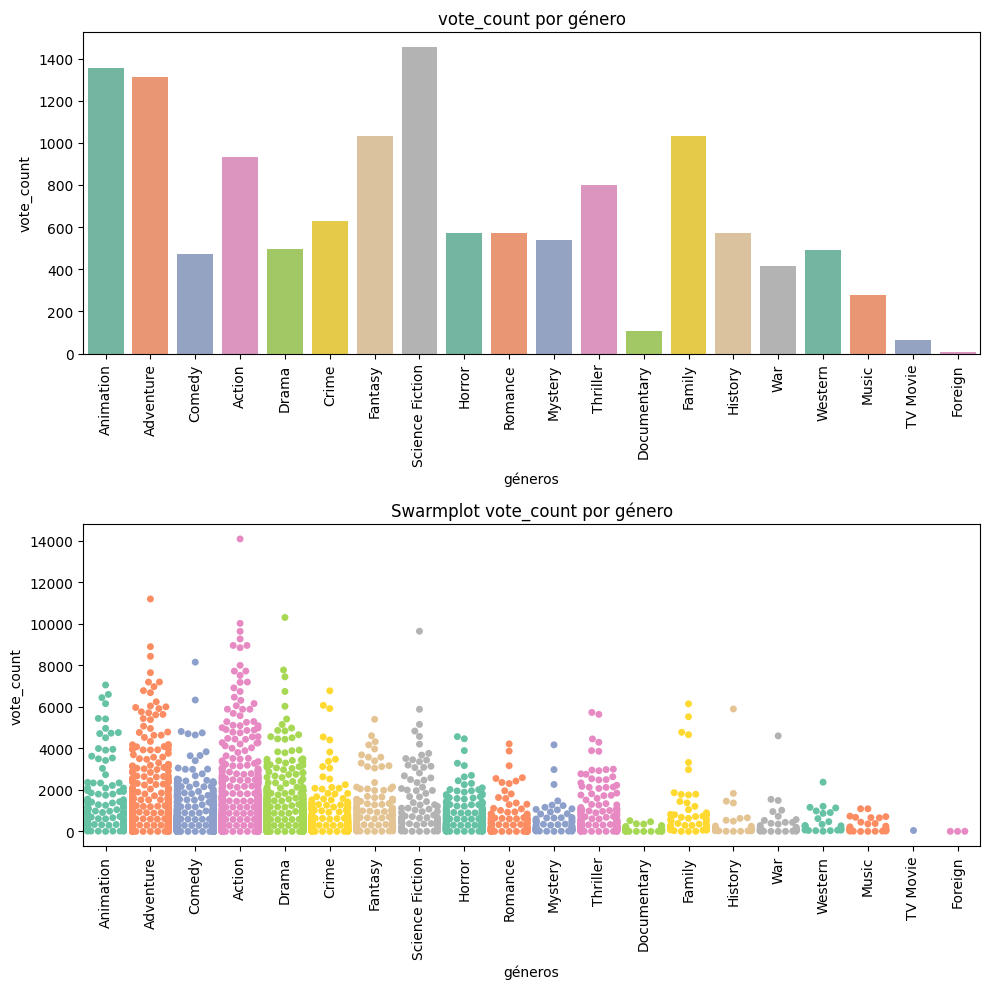

-0.042477888907840884


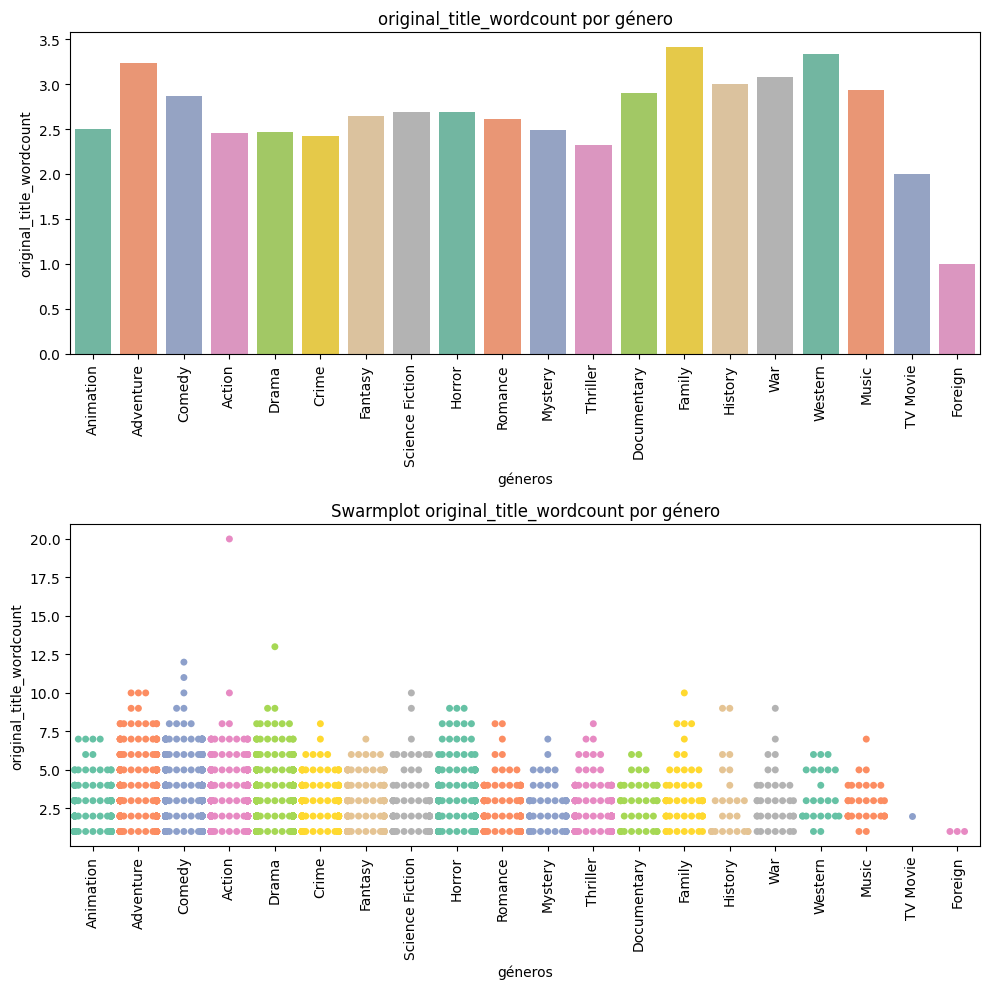

-0.014965369051800497


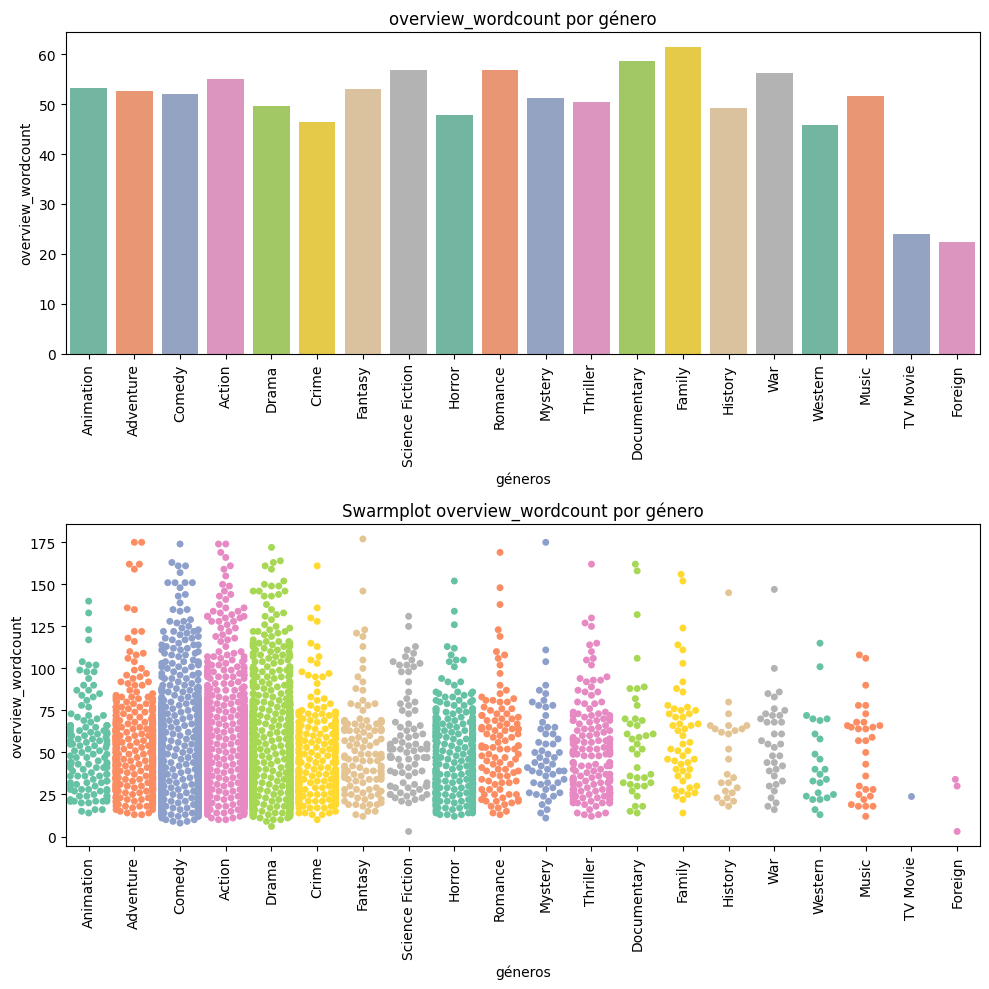

-0.03823885567902883


In [ ]:
for variable in var_num:
  analisisUnivariadoNum(datos_5, variable)

In [ ]:
def analisisUnivariadoCat(datos, variable):

  # Histograma
  plt.figure(figsize=(10,5))
  sns.countplot(data=datos, x='genres', hue=variable, palette='Set2')
  plt.xlabel('géneros')
  plt.ylabel('Frecuencia')
  plt.legend(title=variable)
  plt.title(f'{variable} por género')
  plt.xticks(rotation=90)

  return

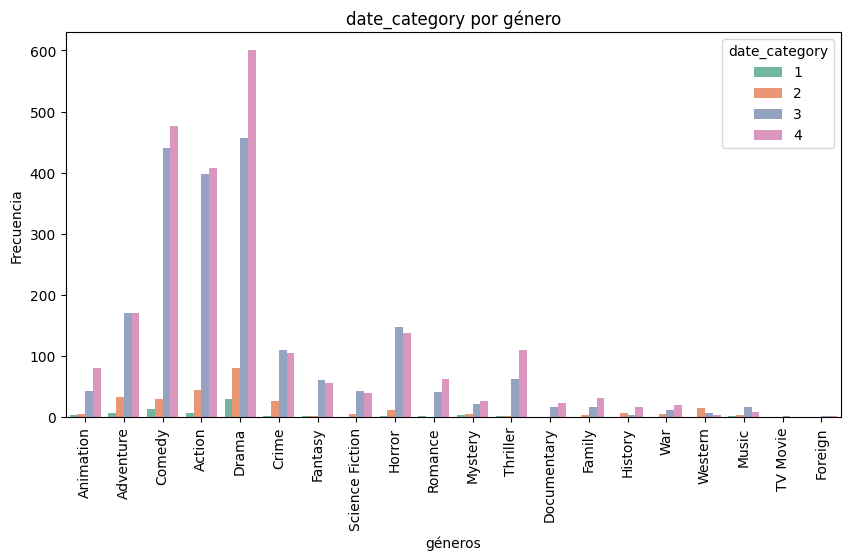

In [ ]:
for variable in var_cat:
  analisisUnivariadoCat(datos_5, variable)

# Ítem b

## VIsualización de las variables por género

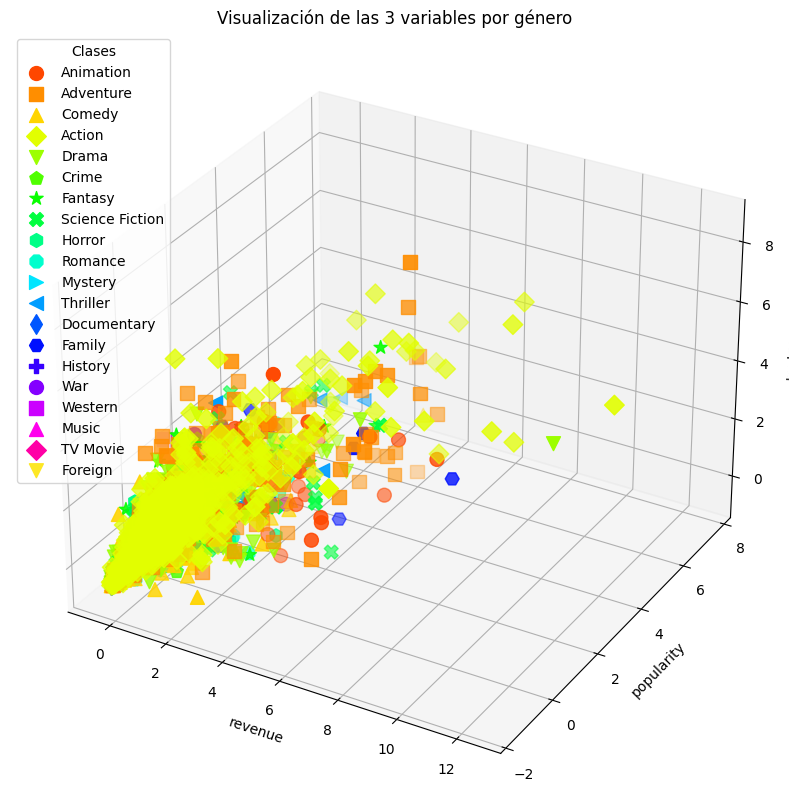

In [ ]:
#Copia
datos_c = datos_5.copy()

# Dejar solo las columnas de las variables
variables = ['budget', 'revenue', 'popularity', 'genres']
datos_c = datos_c[variables].reset_index(drop=True)

# Estandarización de los datos
for variable in ['budget', 'revenue', 'popularity']:
  datos_c[variable] = (datos_c[variable] - datos_c[variable].mean()) / datos_c[variable].std()

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos en 'genres'
unique_genres = datos_c['genres'].unique().tolist()

# Definir una paleta de colores personalizada con una mayor cantidad de colores
custom_palette = sns.color_palette("hsv", len(unique_genres))

# Definir una lista de marcadores para cada clase
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X', 'h', '8', '>', '<', 'd', 'H', 'P', 'o', 's', '^', 'D', 'v']
k = 20
# Asignar manualmente las etiquetas, colores y marcadores a los puntos en el gráfico de dispersión
for i, genre in enumerate(unique_genres):
    indices = datos_c['genres'] == genre
    ax.scatter(
        datos_c.loc[indices, 'revenue'],
        datos_c.loc[indices, 'popularity'],
        datos_c.loc[indices, 'budget'],
        zdir='z',
        s=100,  # Cambiar el tamaño de los puntos
        marker=markers[i],  # Cambiar la forma de los puntos según la clase
        c=custom_palette[i],
        label=genre,
        depthshade=True
    )

# Mostrar la leyenda con los colores y nombres de género
ax.legend(loc="upper left", title="Clases")
ax.set_xlabel('revenue')
ax.set_ylabel('popularity')
ax.set_zlabel('budget')
ax.set_title(f'Visualización de las 3 variables por género')
plt.show()

## Red de Kohonen

In [ ]:
def redKohonen(datos, k):

  P, n = np.shape(datos)
  max_ctd_epocas = 500*n

  # Inicializar los pesos
  np.random.seed(5)
  # w = np.random.uniform(-1, 1, (k, k, n))
  w = np.zeros((k,k,n))
  for i in range(k):
    for j in range(k):
      indice = np.random.randint(P) # Tomamos un ejemplo al azar entre 1 y P
      w[i,j] = datos.iloc[indice]

  # Inicializar el radio de vecinidad
  R_inicial = k
  R = R_inicial

  # Inicializar el factor de aprendizaje
  eta_inicial = 0.1
  eta = eta_inicial

  # Inicializar epocas en 0
  epocas = 0

  # Reshape de w
  w = np.reshape(w, (k*k, n))

  # Bucle while
  while epocas < max_ctd_epocas:
    indice = np.random.randint(P) # Tomar un número i al azar entre 1 y P
    x_p = np.array(datos.iloc[indice])

    # Calcular distancia euclidiana entre x_p y w
    diferencia = np.subtract(w, x_p) # Restar w a x_p
    distancias = np.linalg.norm(diferencia) # Norma de la resta

    # Seleccionar neurona ganadora
    indice_min = np.argmin(distancias)
    w_ij = w[indice_min] # Neurona ganadora

    # Actualizar neurona ganadora
    delta_w = eta * (x_p - w_ij)
    w_ij += delta_w
    w[indice_min] = w_ij

    # Actualizar neuronas vecinas
    for i in range(k):
      w_vecino = w[i]
      d = np.linalg.norm(np.subtract(w_ij, w_vecino))
      if d > 0 and d <= R:
        V = np.exp(-2*d/R)
        delta_w_vecino = V * eta * (x_p - w_vecino)
        w_vecino += delta_w_vecino
        w[i] = w_vecino

    # Incrementar épocas
    epocas += 1

    # Actualizar el radio de vecinidad
    R = (max_ctd_epocas - epocas) * R_inicial / max_ctd_epocas

    # Actualizar el factor de aprendizaje
    eta = eta_inicial * (1 - epocas / max_ctd_epocas)

  w_final = np.reshape(w, (k,k,n))

  return w, w_final

In [ ]:
#Copia
datos_RK = datos_5.copy()

# Dejar solo las columnas de las variables
variables_b = ['budget', 'revenue', 'popularity']
datos_RK = datos_RK[variables_b].reset_index(drop=True)

# Estandarización de los datos
for variable in variables_b:
  datos_RK[variable] = (datos_RK[variable] - datos_RK[variable].mean()) / datos_RK[variable].std()

w_2d, w_3d = redKohonen(datos_RK, k=20)

### Matriz U y variables por separado

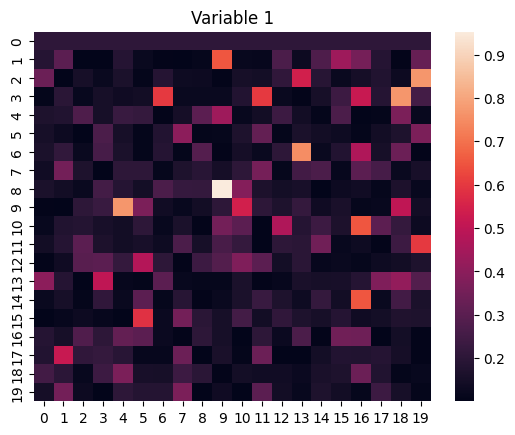

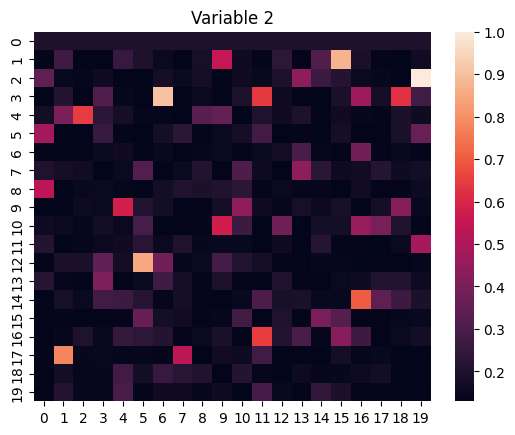

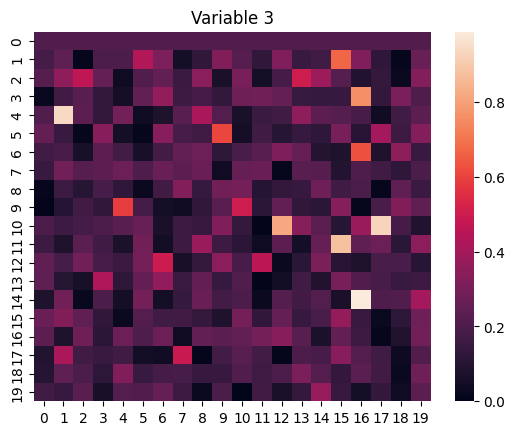

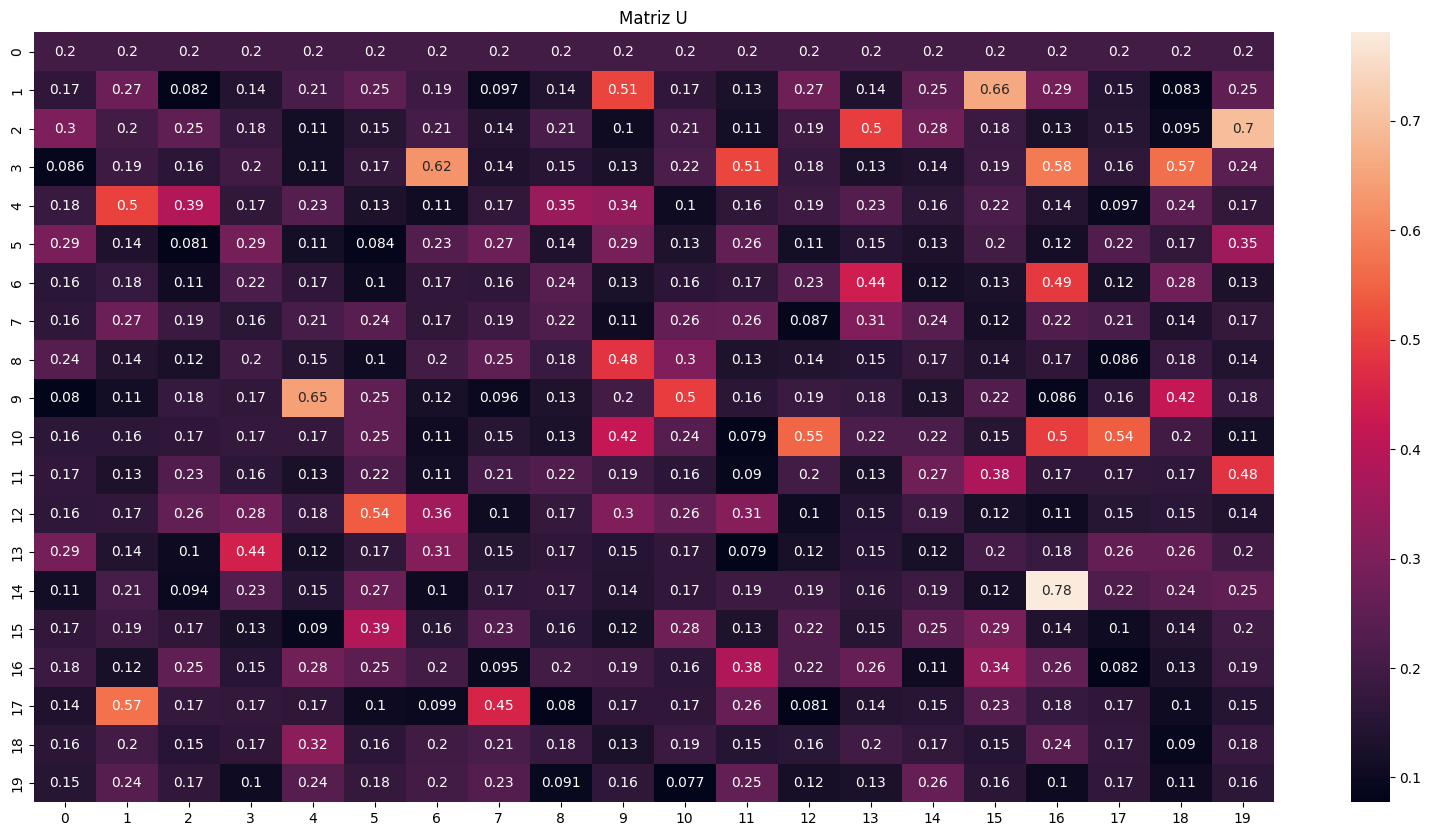

In [ ]:
pesos = w_3d.copy()

# Normaliza los pesos si es necesario
pesos_normalizados = (pesos - np.min(pesos)) / (np.max(pesos) - np.min(pesos))  # Normalización min-max

# Mostrar las variables por separado
k, k, n = pesos.shape  # k es el tamaño de la red de Kohonen, n es el número de variables

for i in range(n):
  variable = pesos_normalizados[:, :, i]
  plt.figure()
  sns.heatmap(variable)
  plt.title('Variable {}'.format(i+1))
  plt.show()

# Mostrar la matriz U
plt.figure(figsize=(20, 10))
sns.heatmap(pesos_normalizados.mean(axis=2), annot=True)
plt.title('Matriz U')
plt.show()

### Activaciones según género

In [ ]:
def asignar_neurona_ganadora(muestra, pesos):
  # Calcular la distancia entre la muestra y los pesos de todas las neuronas
  diferencias = np.subtract(pesos, muestra)
  distancias = np.linalg.norm(diferencias, axis=1)

  # Encontrar la neurona ganadora (índice de la neurona con la distancia mínima)
  indice_ganadora = np.argmin(distancias)

  return indice_ganadora

def agrupar_datos_entrenamiento(datos, pesos):
  datos_entrenamiento = datos.copy()
  neuronas_asignadas = []

  # Asignar cada muestra de entrenamiento a la neurona ganadora correspondiente
  for indice in range(len(datos_entrenamiento)):
    muestra = np.array(datos_entrenamiento.iloc[indice])
    neurona_ganadora = asignar_neurona_ganadora(muestra, pesos)
    neuronas_asignadas.append(neurona_ganadora)

  datos_entrenamiento['neurona_asignada'] = neuronas_asignadas
  return datos_entrenamiento

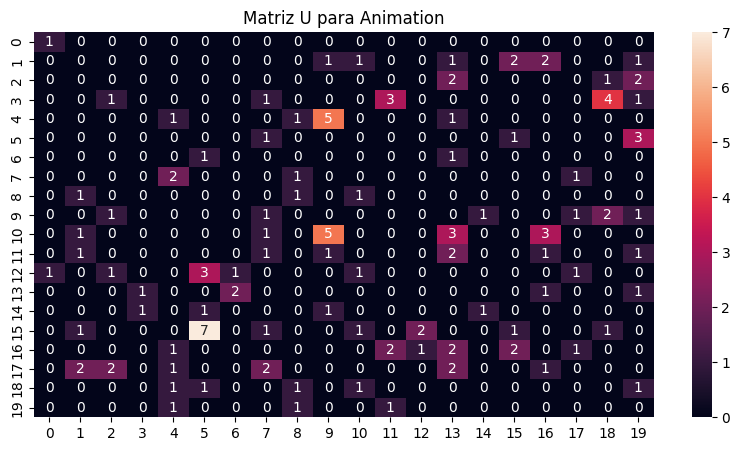

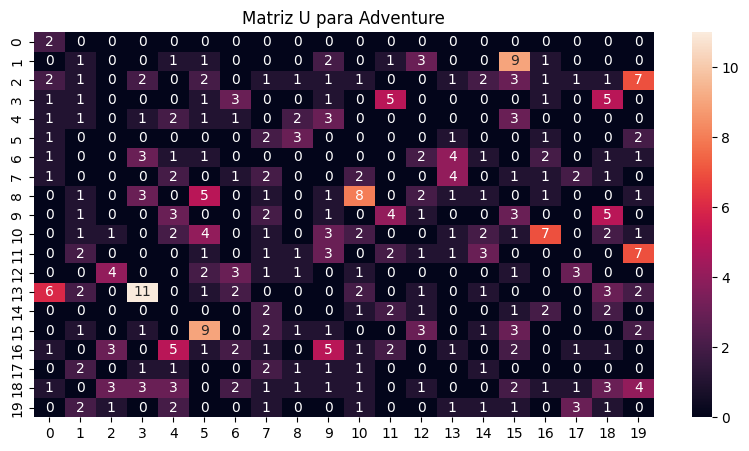

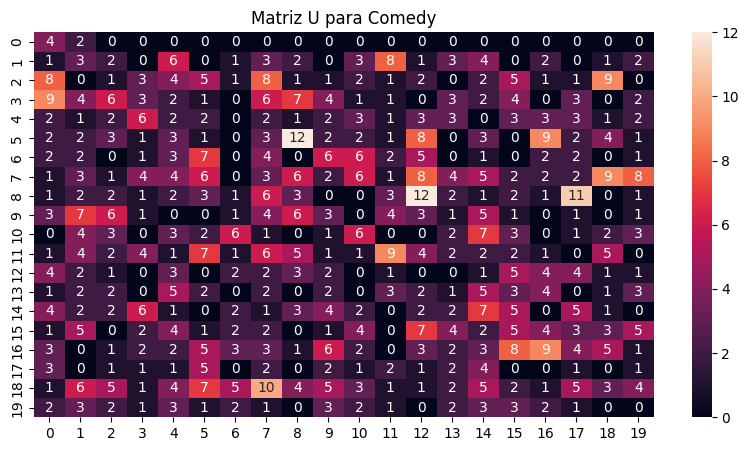

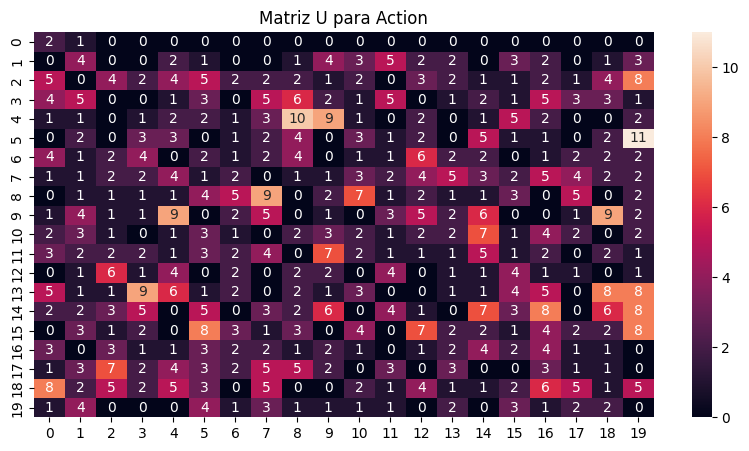

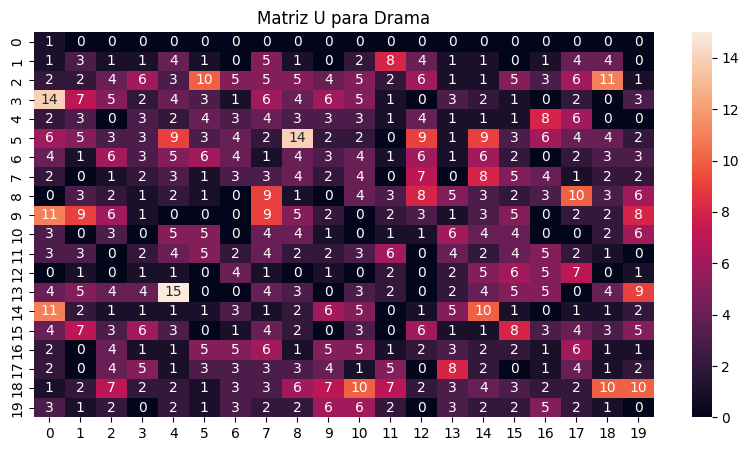

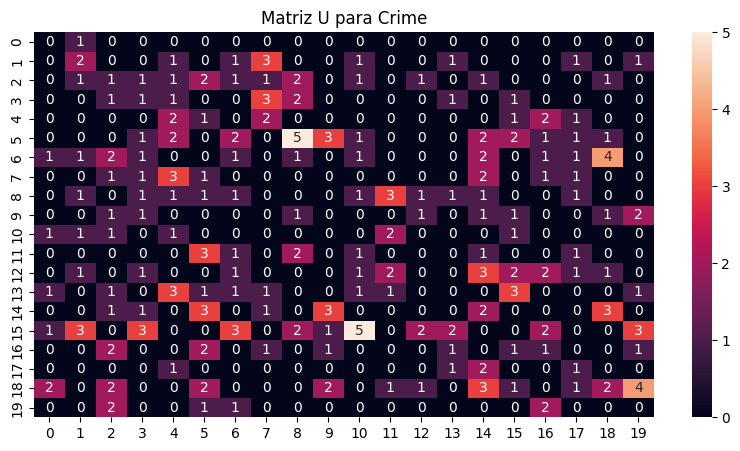

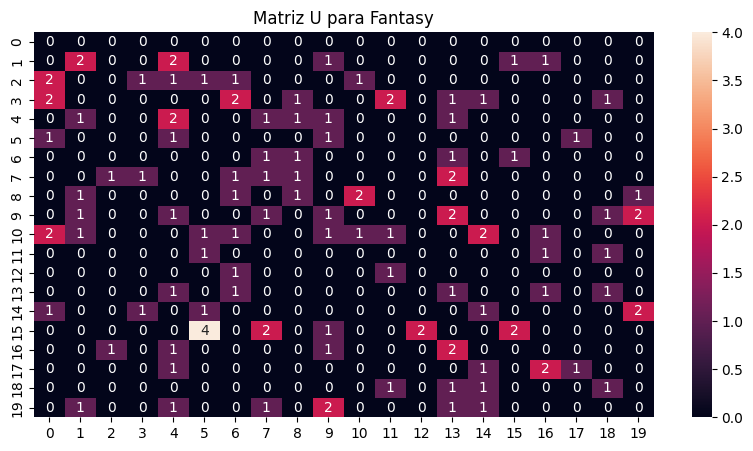

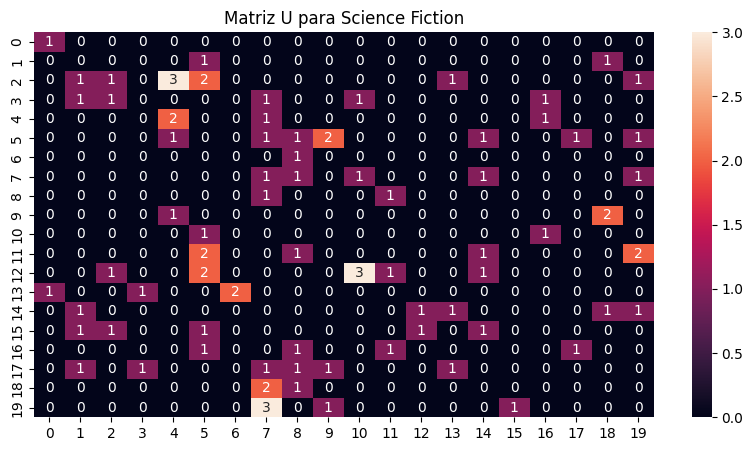

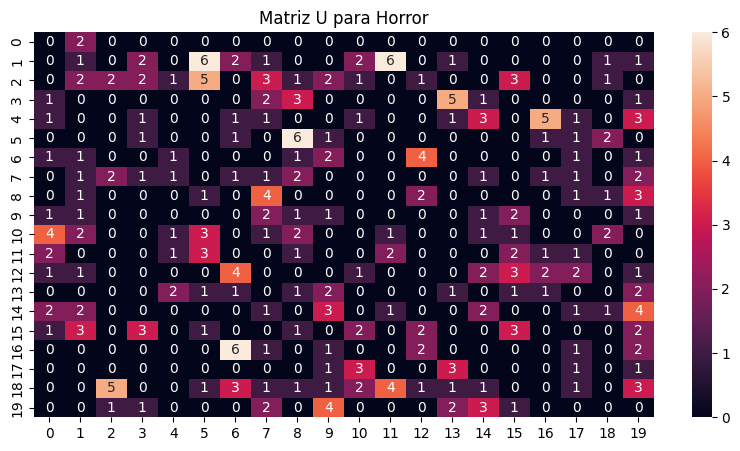

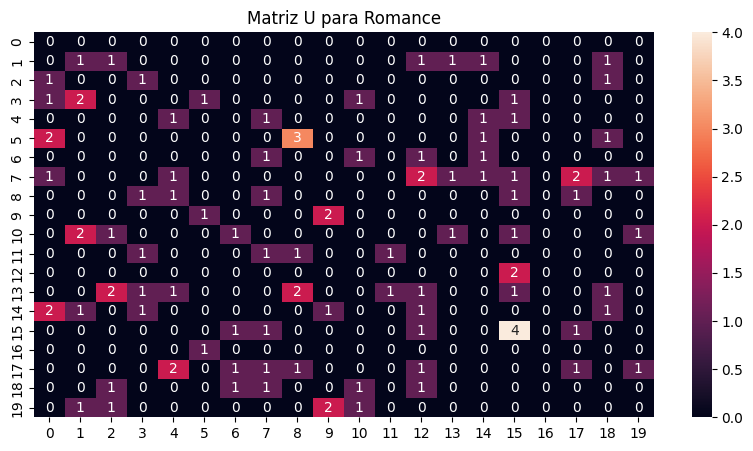

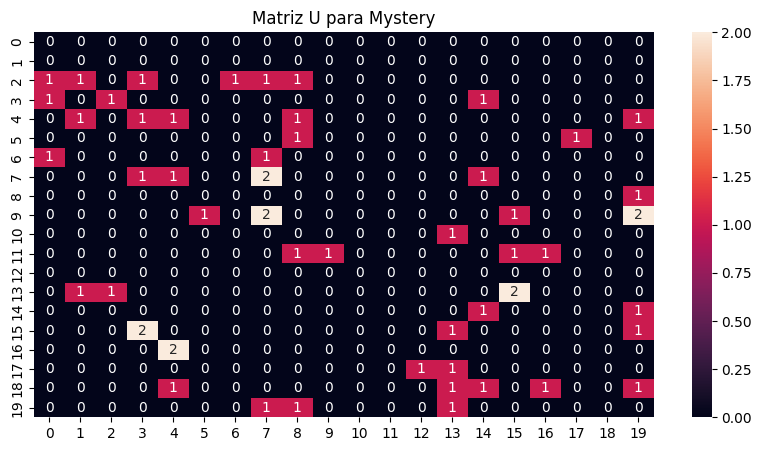

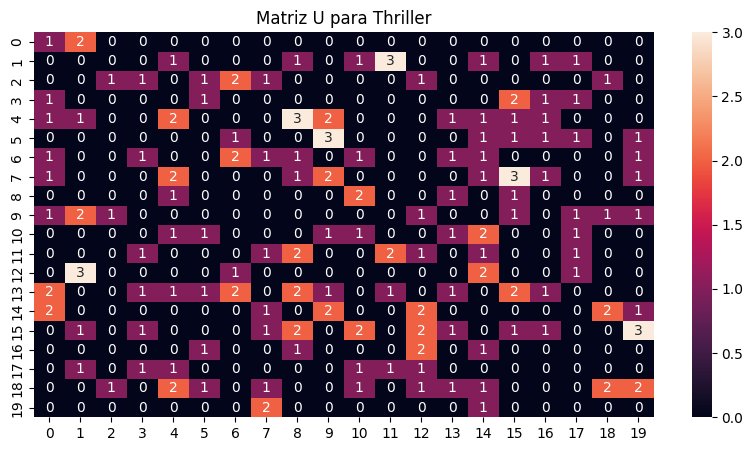

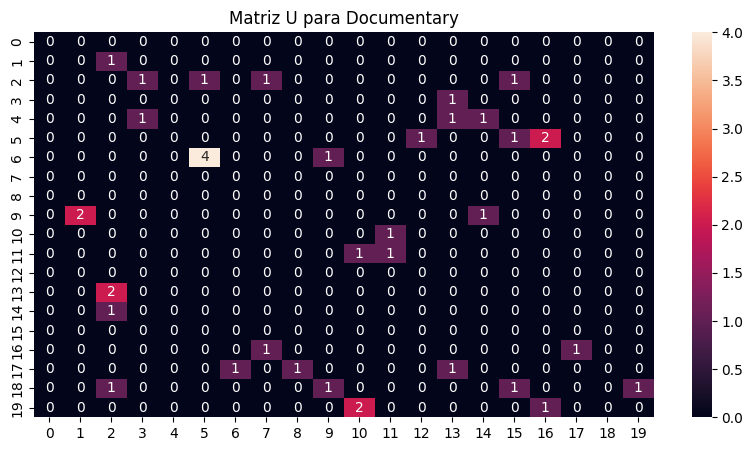

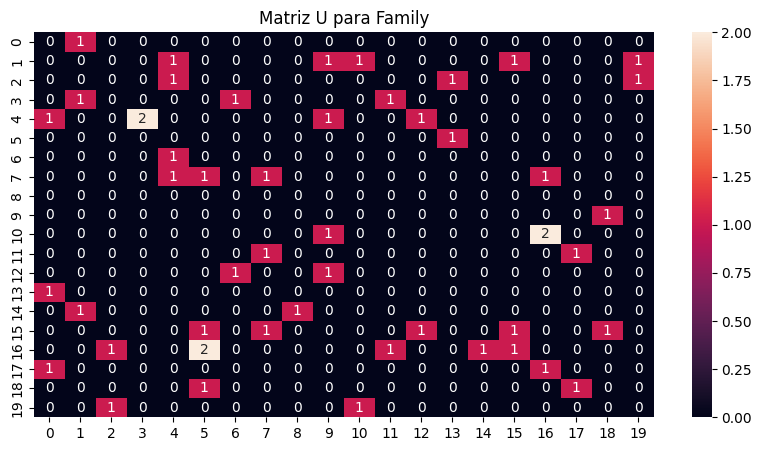

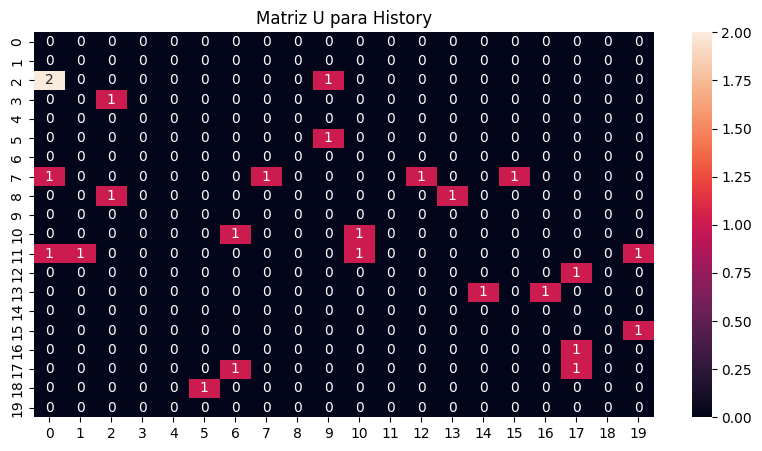

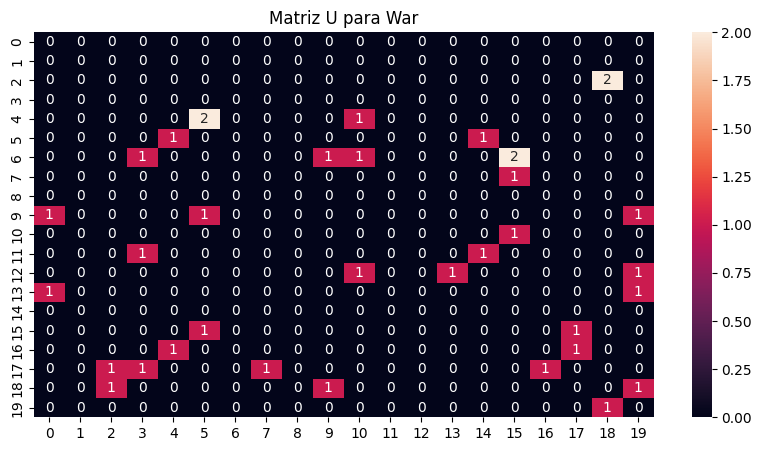

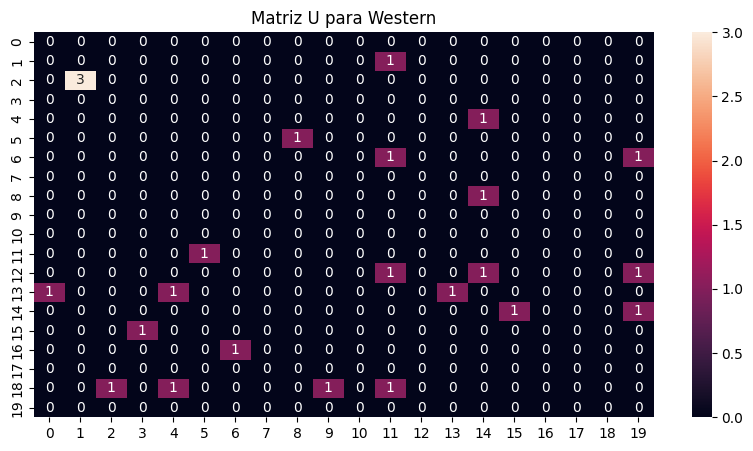

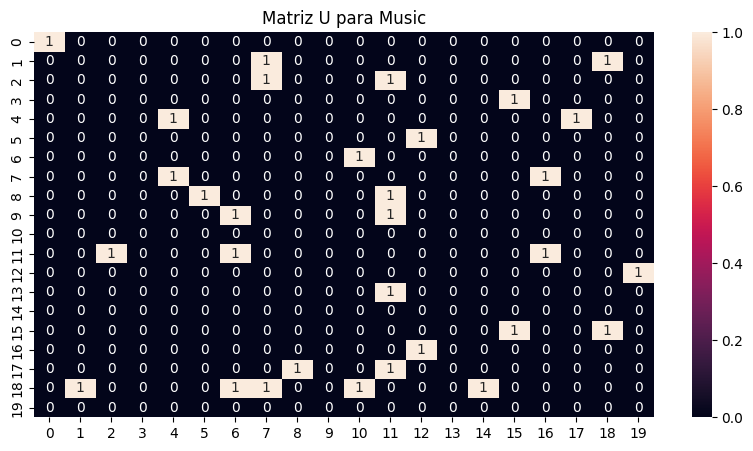

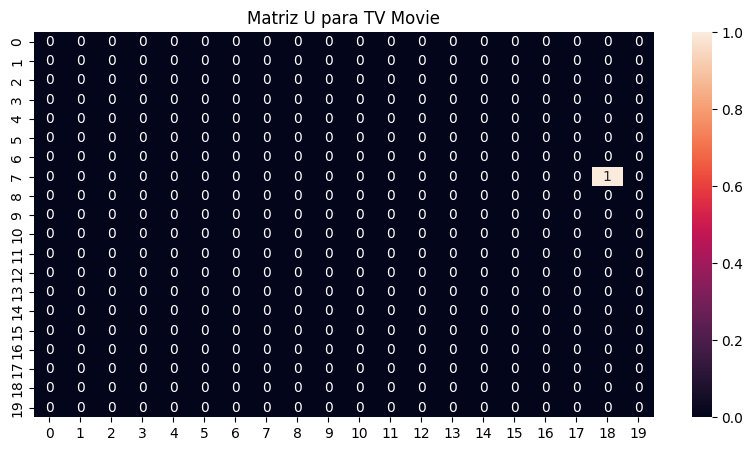

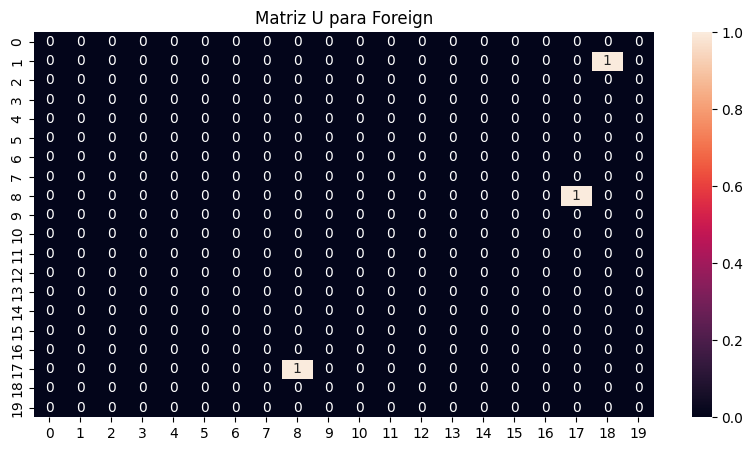

In [ ]:
#Copia
datos_c = datos_5.copy()

# Dejar solo las columnas de las variables
variables = ['budget', 'revenue', 'popularity', 'genres']
datos_c = datos_c[variables].reset_index(drop=True)

# Estandarización de los datos
for variable in ['budget', 'revenue', 'popularity']:
  datos_c[variable] = (datos_c[variable] - datos_c[variable].mean()) / datos_c[variable].std()

k = 20
matriz_aux = np.zeros((k, k))
generos = datos_5['genres'].unique().tolist()

for numero in range(k*k):
  # Calcular las coordenadas (fila, columna)
  fila = numero // k
  columna = numero % k
  # Asignar el número a la posición en la matriz
  matriz_aux[fila, columna] = numero

for genero in generos:

  datos_analizar = datos_c[datos_c['genres'] == genero]
  datos_analizar_1 = datos_analizar.drop('genres', axis=1).reset_index(drop=True)

  datos_entrenamiento = agrupar_datos_entrenamiento(datos_analizar_1, w_2d)
  neurona_asignada = datos_entrenamiento.loc[:,'neurona_asignada'].tolist()

  neuronas = np.zeros((k,k))
  for i in range(k):
    for j in range(k):
      elemento = matriz_aux[i,j]
      veces = neurona_asignada.count(elemento)
      neuronas[i,j] = veces

  # Mostrar la matriz U
  plt.figure(figsize=(10, 5))
  sns.heatmap(neuronas, annot=True)
  plt.title(f'Matriz U para {genero}')
  plt.show()

## K-means

In [ ]:
def kmeans(datos_original, k, variables):

  datos = datos_original.copy()

  # Centroides: genero k centroides aleatorios distintos
  centroides = np.array(datos.sample(k, ignore_index=True))
  aux = np.zeros((k,len(datos_original.iloc[0]))) # Auxiliar de centroides

  if (np.array(centroides)==0).all():
    aux +=1

  # Asignar aleatoriamente un número de 1 a K a cada una de las observaciones
  clases_iniciales = np.concatenate([np.arange(k)] * (len(datos) // k))
  clases_iniciales = np.concatenate([clases_iniciales, np.random.choice(np.arange(k), size=len(datos) % k, replace=False)])
  np.random.shuffle(clases_iniciales)
  datos["clases"] = clases_iniciales

  iter = 0

  clases = np.arange(0,k)

  while (np.all(centroides!=aux)): # Hasta que no haya cambios entre las iteraciones o hasta que llegue a 40 iter

    aux = np.copy(centroides)

    for i in clases:
      c = datos.loc[datos["clases"] == i, variables].mean()
      centroides[i] = np.array(c)

    distancias = np.linalg.norm(datos[variables].values[:, np.newaxis, :] - centroides, axis=2)
    datos["clases"] = np.nanargmin(distancias, axis=1)

    #print(iter)
    iter += 1

  distancias_centroides = np.linalg.norm(datos[variables].values - centroides[datos["clases"]], axis=1) ** 2
  suma_distancias = np.sum(distancias_centroides)

  return datos, suma_distancias

### Método del codo

In [ ]:
def ejecutarKmeans(datos_5, k):
  #Copia
  datos_KM = datos_5.copy()

  # Dejar solo las columnas de las variables
  variables = ['budget', 'revenue', 'popularity']
  datos_KM = datos_KM[variables].reset_index(drop=True)

  # Estandarización de los datos
  for variable in variables:
    datos_KM[variable] = (datos_KM[variable] - datos_KM[variable].mean()) / datos_KM[variable].std()

  datos_KM_final, suma_distancias = kmeans(datos_KM, k, variables)

  return datos_KM_final, suma_distancias

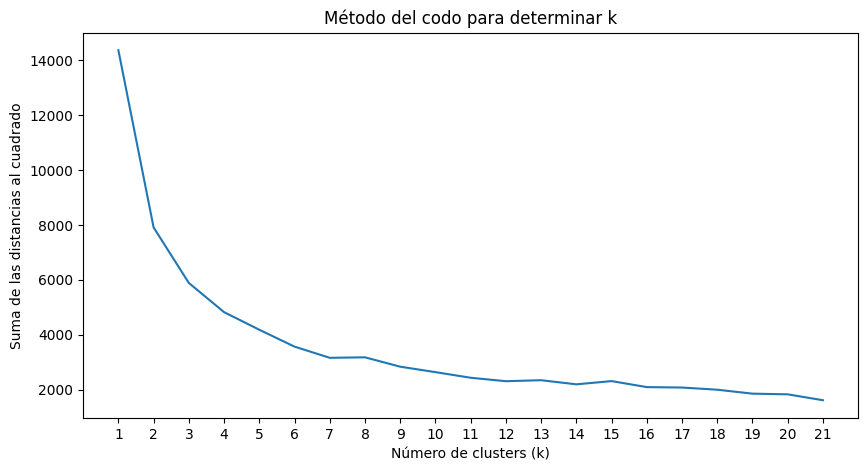

In [ ]:
k_valores = range(1, 22)
sumas = []

for k in k_valores: # Tarda 20 segundos aprox.
  datos_KM_final, suma_distancias = ejecutarKmeans(datos_5, k)
  sumas.append(suma_distancias)

plt.figure(figsize=(10, 5))
plt.plot(k_valores, sumas)
plt.xticks(k_valores)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Suma de las distancias al cuadrado")
plt.title("Método del codo para determinar k")
plt.show()

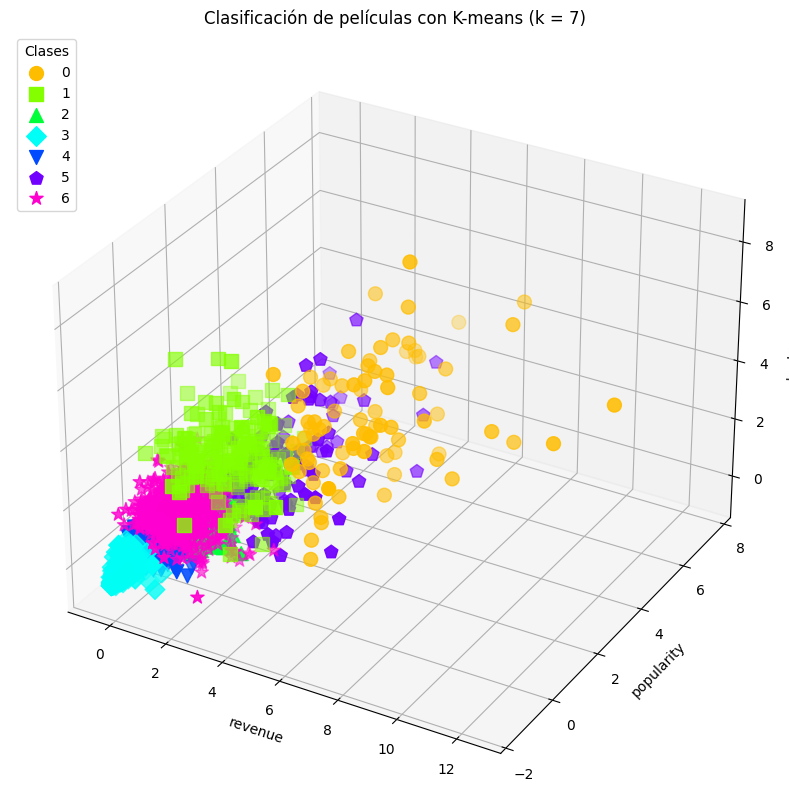

In [ ]:
k = 7
datos_KM_final, suma_distancias = ejecutarKmeans(datos_5, k)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos en 'genres'
unique_genres = range(0, k) #datos_KM_final['clases'].unique().tolist()

# Definir una paleta de colores personalizada con una mayor cantidad de colores
custom_palette = sns.color_palette("hsv", len(unique_genres))

# Definir una lista de marcadores para cada clase
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X', 'h', '8', '>', '<', 'd', 'H', 'P', 'o', 's', '^', 'D', 'v']

# Asignar manualmente las etiquetas, colores y marcadores a los puntos en el gráfico de dispersión
for i, genre in enumerate(unique_genres):
  indices = datos_KM_final['clases'] == genre
  ax.scatter(
    datos_KM_final.loc[indices, 'revenue'],
    datos_KM_final.loc[indices, 'popularity'],
    datos_KM_final.loc[indices, 'budget'],
    zdir='z',
    s=100,  # Cambiar el tamaño de los puntos
    marker=markers[i],  # Cambiar la forma de los puntos según la clase
    c=custom_palette[i],
    label=genre,
    depthshade=True
  )

# Mostrar la leyenda con los colores y nombres de género
ax.legend(loc="upper left", title="Clases")
ax.set_xlabel('revenue')
ax.set_ylabel('popularity')
ax.set_zlabel('budget')
ax.set_title(f'Clasificación de películas con K-means (k = {k})')
plt.show()

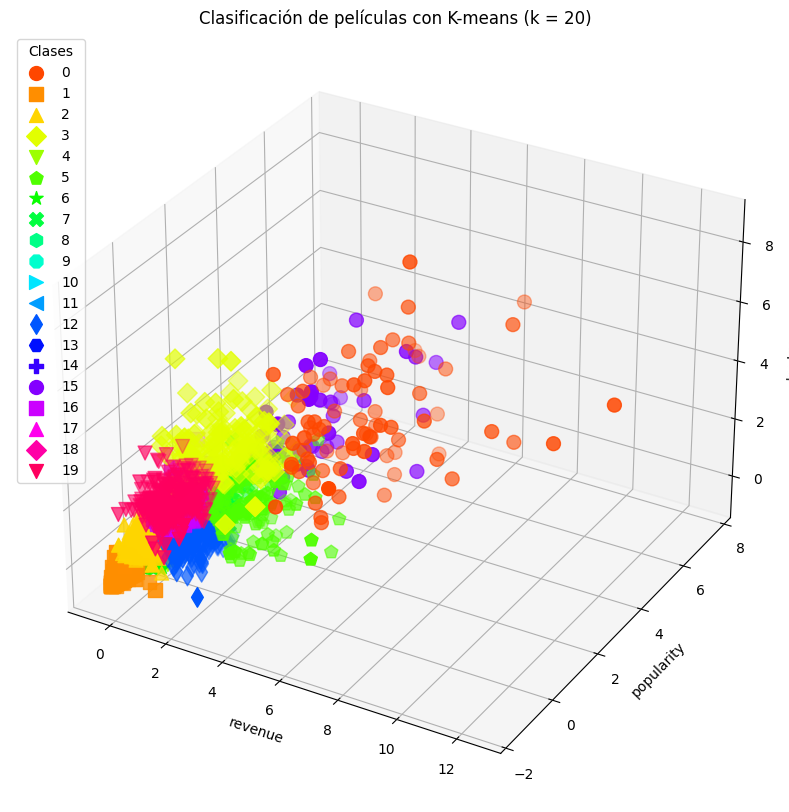

In [ ]:
k = 20
datos_KM_final, suma_distancias = ejecutarKmeans(datos_5, k)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos en 'genres'
unique_genres = range(0, k) #datos_KM_final['clases'].unique().tolist()

# Definir una paleta de colores personalizada con una mayor cantidad de colores
custom_palette = sns.color_palette("hsv", len(unique_genres))

# Definir una lista de marcadores para cada clase
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X', 'h', '8', '>', '<', 'd', 'H', 'P', 'o', 's', '^', 'D', 'v']

# Asignar manualmente las etiquetas, colores y marcadores a los puntos en el gráfico de dispersión
for i, genre in enumerate(unique_genres):
    indices = datos_KM_final['clases'] == genre
    ax.scatter(
        datos_KM_final.loc[indices, 'revenue'],
        datos_KM_final.loc[indices, 'popularity'],
        datos_KM_final.loc[indices, 'budget'],
        zdir='z',
        s=100,  # Cambiar el tamaño de los puntos
        marker=markers[i],  # Cambiar la forma de los puntos según la clase
        c=custom_palette[i],
        label=genre,
        depthshade=True
    )

# Mostrar la leyenda con los colores y nombres de género
ax.legend(loc="upper left", title="Clases")
ax.set_xlabel('revenue')
ax.set_ylabel('popularity')
ax.set_zlabel('budget')
ax.set_title(f'Clasificación de películas con K-means (k = {k})')
plt.show()

## Agrupamiento jerárquico

In [ ]:
def agrupamientoJerarquico(datos_originales):
  grupos = {}
  max_indice = max(datos_originales.index)
  i = 0
  datos = datos_originales.copy()

  while len(datos) > 1:
    i += 1
    print(i)
    indices_minimos, dist_min = encontrarDistanciaMinima(datos.copy())

    if indices_minimos[0] <= max_indice and indices_minimos[1] <= max_indice: # dos puntos
      nuevo_grupo = indices_minimos
    elif indices_minimos[0] > max_indice and indices_minimos[1] <= max_indice: # grupo y punto
      nuevo_grupo = grupos[indices_minimos[0]][4] + [indices_minimos[1]]
    elif indices_minimos[0] <= max_indice and indices_minimos[1] > max_indice: # punto y grupo
      nuevo_grupo = grupos[indices_minimos[1]][4] + [indices_minimos[0]]
    else: # dos grupos
      nuevo_grupo = grupos[indices_minimos[0]][4] + grupos[indices_minimos[1]][4]

    grupos[max_indice + i] = [indices_minimos[0], indices_minimos[1], dist_min, len(nuevo_grupo), nuevo_grupo]

    puntos_grupo = datos_originales.loc[nuevo_grupo, :] # agarra dos puntos o dos grupos o un grupo y un punto
    centroide = puntos_grupo.mean() # Queda una fila. Define el centroide del grupo; es un registro donde se tienen los promedios de los dos puntos en cada columna
    centroide.name = max_indice + i # nombre del indice (es decir el propio indice) para agregar al DF de datos
    datos = datos.append(centroide).copy() # Agrega el nuevo grupo al final del DF
    datos.drop(indices_minimos, inplace=True) # Elimina los registros / fila que unio en un grupo. inidices_minimos = [ind_1, ind_2]

  matriz = np.zeros([len(datos_originales) - 1, 4])
  c = 0
  for clave in grupos.keys():
    matriz[c, :] = grupos[clave][0:4]
    c += 1

  return matriz, grupos

def encontrarDistanciaMinima(datos):
  indices = datos.index.values
  distancias = np.linalg.norm(datos.values[:, None] - datos.values, axis=2)
  np.fill_diagonal(distancias, np.inf)
  indice_fila, indice_col = np.unravel_index(np.argmin(distancias), distancias.shape)
  indice = [indices[indice_fila], indices[indice_col]]
  distancia_minima = distancias[indice_fila, indice_col]
  return indice, distancia_minima

In [ ]:
#Copia
datos_AJ = datos_5.copy()

# Dejar solo las columnas de las variables
variables = ['budget', 'revenue', 'popularity']
datos_AJ = datos_AJ[variables].reset_index(drop=True)

# Estandarización de los datos
for variable in variables:
  datos_AJ[variable] = (datos_AJ[variable] - datos_AJ[variable].mean()) / datos_AJ[variable].std()

matriz_AJ, grupos_AJ = agrupamientoJerarquico(datos_AJ) # Tarda 16 min aprox.

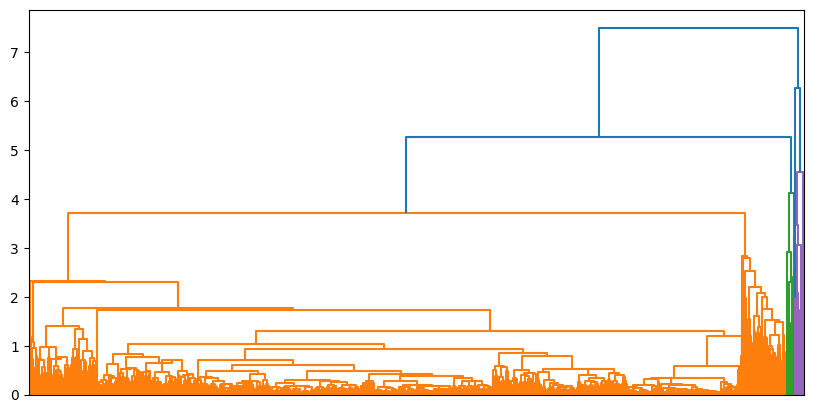

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram(matriz_AJ, no_labels=True)
plt.show()

In [ ]:
clases_AJ = fcluster(matriz_AJ, 20, criterion='maxclust')
datos_AJ["clases"] = clases_AJ
datos_AJ['clases'] = datos_AJ['clases'].replace(np.arange(1, 21), np.arange(0, 20))
print(datos_AJ)
valores_unicos = datos_AJ['clases'].unique().tolist()
print(valores_unicos)

        budget   revenue  popularity  clases
0    -0.035296  1.795349    2.150654       4
1     0.838620  1.095631    1.320222       0
2    -0.384862 -0.050038   -0.895212       0
3     0.713775  0.619532    1.473360       0
4     0.089549 -0.158082   -0.664157       0
...        ...       ...         ...     ...
4784 -0.509707  0.602686    5.324903       6
4785 -0.484738 -0.444587   -1.322250       0
4786 -0.764391 -0.556228   -1.393066       0
4787 -0.734428 -0.556606   -1.524620       0
4788 -0.659521 -0.555695   -1.538437       0

[4789 rows x 4 columns]
[4, 0, 8, 7, 16, 6, 12, 15, 9, 14, 3, 2, 1, 19, 17, 13, 18, 10, 5, 11]


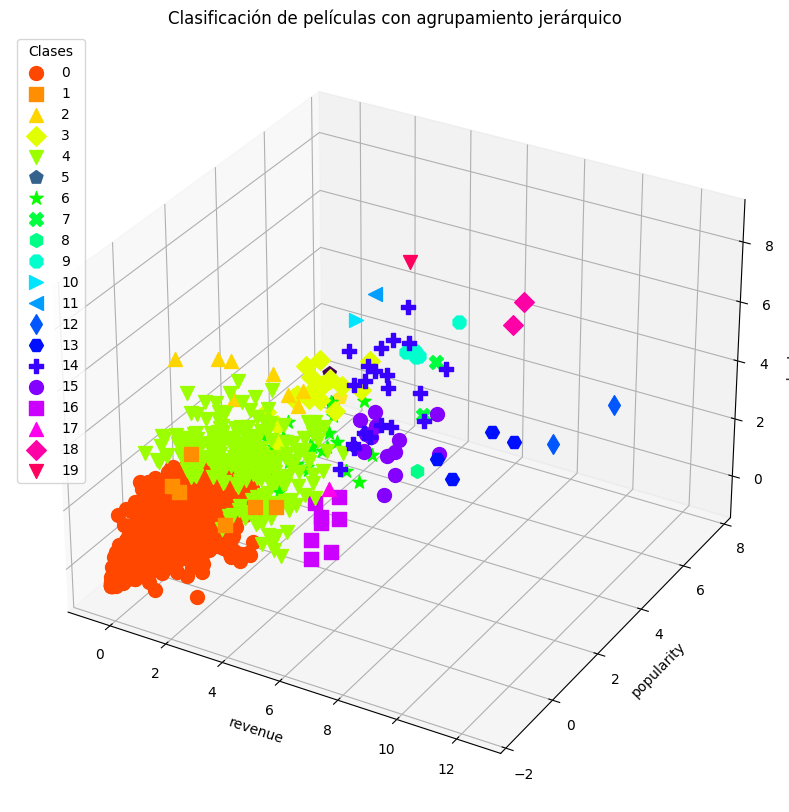

In [ ]:
k = 20

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos en 'genres'
unique_genres = range(0, k)

# Definir una paleta de colores personalizada con una mayor cantidad de colores
custom_palette = sns.color_palette("hsv", len(unique_genres))

# Definir una lista de marcadores para cada clase
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X', 'h', '8', '>', '<', 'd', 'H', 'P', 'o', 's', '^', 'D', 'v']

# Asignar manualmente las etiquetas, colores y marcadores a los puntos en el gráfico de dispersión
for i, genre in enumerate(unique_genres):
  indices = datos_AJ['clases'] == genre
  ax.scatter(
    datos_AJ.loc[indices, 'revenue'],
    datos_AJ.loc[indices, 'popularity'],
    datos_AJ.loc[indices, 'budget'],
    zdir='z',
    s=100,  # Cambiar el tamaño de los puntos
    marker=markers[i],  # Cambiar la forma de los puntos según la clase
    c=custom_palette[i],
    label=genre,
    depthshade=False
  )

# Mostrar la leyenda con los colores y nombres de género
ax.legend(loc="upper left", title="Clases")
ax.set_xlabel('revenue')
ax.set_ylabel('popularity')
ax.set_zlabel('budget')
ax.set_title(f'Clasificación de películas con agrupamiento jerárquico')
plt.show()

# Ítem c

## Visualización de las 3 variables por género

In [ ]:
#Copia
datos_c = datos_5.copy()

# Filtrar el DataFrame por los géneros deseados
generos_deseados = ['Action', 'Comedy', 'Drama']
datos_c = datos_c[datos_c['genres'].isin(generos_deseados)]
datos_c['genres'] = datos_c['genres'].replace(['Action', 'Comedy', 'Drama'], [0,1,2])

# Dejar solo las columnas de las variables
variables = ['budget', 'revenue', 'popularity', 'genres']
datos_c = datos_c[variables].reset_index(drop=True)

# Estandarización de los datos
for variable in ['budget', 'revenue', 'popularity']:
  datos_c[variable] = (datos_c[variable] - datos_c[variable].mean()) / datos_c[variable].std()

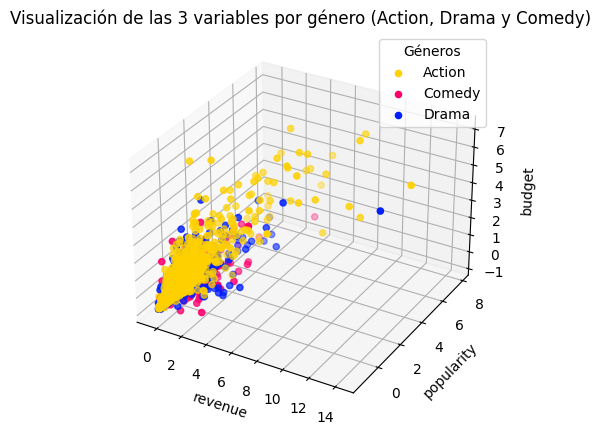

In [ ]:
nombres_generos = {0: 'Action', 1: 'Comedy', 2: 'Drama'}

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
#scatter = ax.scatter(datos_c["revenue"], datos_c["popularity"], datos_c["budget"], zdir='z', s=20, c=datos_c['genres'], depthshade=True)

# Obtener los valores únicos en 'genres' y sus correspondientes colores
unique_genres = [0,1,2]
colors = ['#FFD100', '#FF006C', '#001FFF']  # Ejemplo de colores predefinidos

# Asignar manualmente las etiquetas y colores a los puntos en el gráfico de dispersión
for i, genre in enumerate(unique_genres):
    indices = datos_c['genres'] == genre
    ax.scatter(datos_c.loc[indices, 'revenue'], datos_c.loc[indices, 'popularity'], datos_c.loc[indices, 'budget'],
               zdir='z', s=20, c=colors[i], label=nombres_generos[genre], depthshade=True)

# Mostrar la leyenda con los colores y nombres de género
ax.legend(title="Géneros")
ax.set_xlabel('revenue')
ax.set_ylabel('popularity')
ax.set_zlabel('budget')
ax.set_title('Visualización de las 3 variables por género (Action, Drama y Comedy)')
plt.show()

## Redes de Kohonen

In [ ]:
#Copia
datos_RK_c = datos_5.copy()

# Filtrar el DataFrame por los géneros deseados
generos_deseados = ['Action', 'Drama', 'Comedy']
datos_RK_c = datos_RK_c[datos_RK_c['genres'].isin(generos_deseados)]

# Dejar solo las columnas de las variables
variables = ['budget', 'revenue', 'popularity']
datos_RK_c = datos_RK_c[variables].reset_index(drop=True)

# Estandarización de los datos
for variable in variables:
  datos_RK_c[variable] = (datos_RK_c[variable] - datos_RK_c[variable].mean()) / datos_RK_c[variable].std()

k = 20
w_2d_c, w_3d_c = redKohonen(datos_RK_c, k)

### Matrices

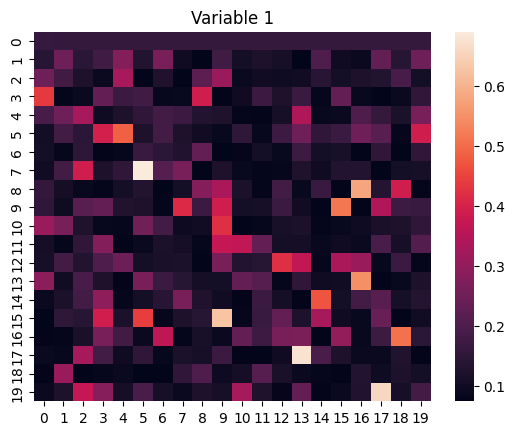

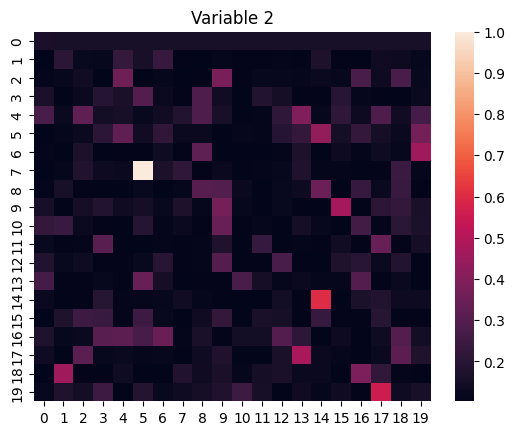

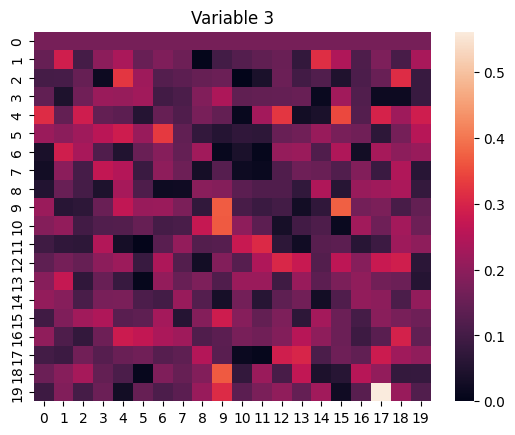

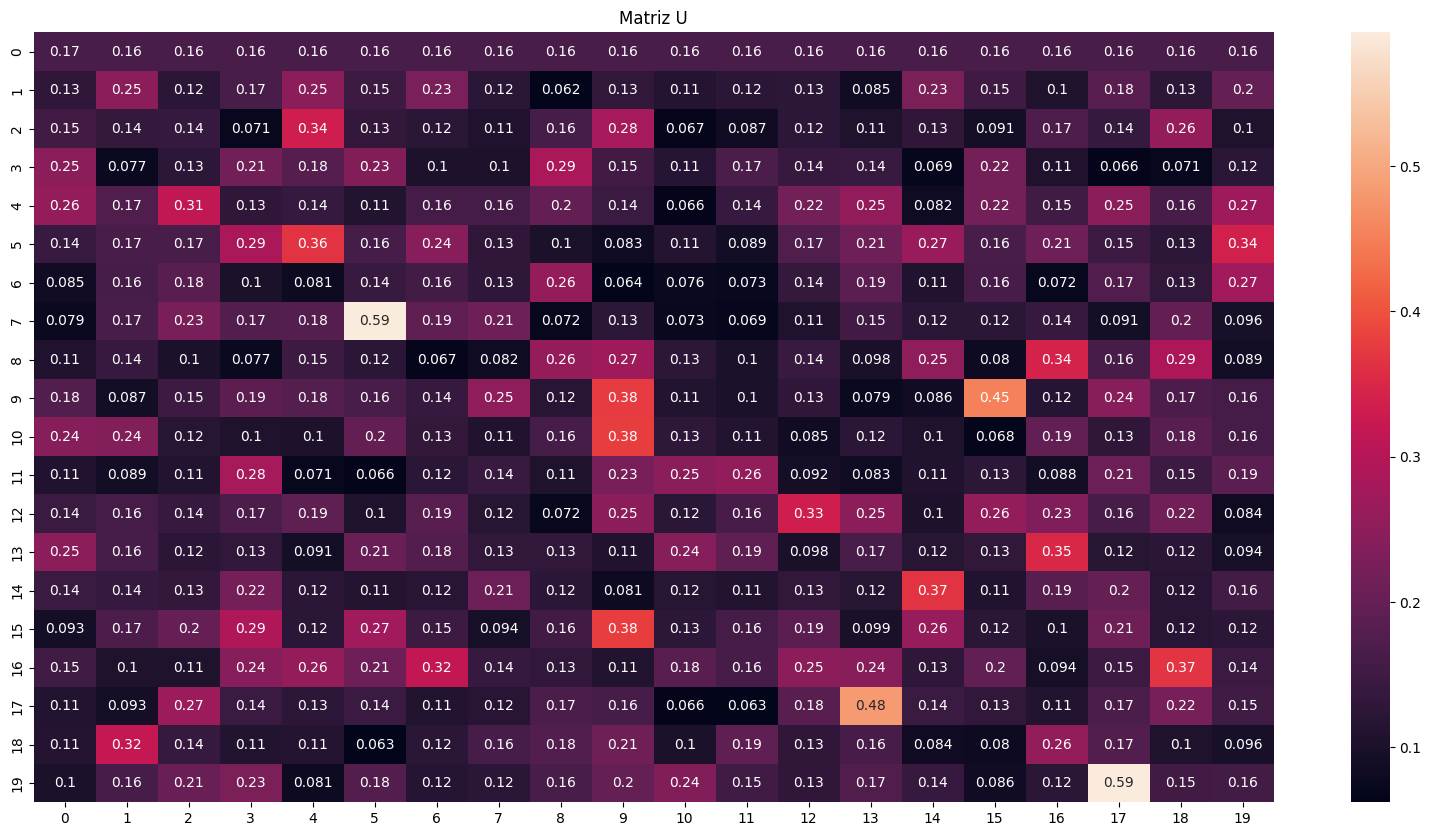

In [ ]:
# Matrices

pesos = w_3d_c.copy()

# Normaliza los pesos si es necesario
pesos_normalizados = (pesos - np.min(pesos)) / (np.max(pesos) - np.min(pesos))  # Normalización min-max

# Mostrar las variables por separado
k, k, n = pesos.shape  # k es el tamaño de la red de Kohonen, n es el número de variables

for i in range(n):
  variable = pesos_normalizados[:, :, i]
  plt.figure()
  sns.heatmap(variable)
  plt.title('Variable {}'.format(i+1))
  plt.show()

# Mostrar la matriz U
plt.figure(figsize=(20, 10))
sns.heatmap(pesos_normalizados.mean(axis=2), annot=True)
plt.title('Matriz U')
plt.show()

In [ ]:
def asignar_neurona_ganadora(muestra, pesos):
  # Calcular la distancia entre la muestra y los pesos de todas las neuronas
  diferencias = np.subtract(pesos, muestra)
  distancias = np.linalg.norm(diferencias, axis=1)

  # Encontrar la neurona ganadora (índice de la neurona con la distancia mínima)
  indice_ganadora = np.argmin(distancias)

  return indice_ganadora

def agrupar_datos_entrenamiento(datos, pesos):
  datos_entrenamiento = datos.copy()
  neuronas_asignadas = []

  # Asignar cada muestra de entrenamiento a la neurona ganadora correspondiente
  for indice in range(len(datos_entrenamiento)):
    muestra = np.array(datos_entrenamiento.iloc[indice])
    neurona_ganadora = asignar_neurona_ganadora(muestra, pesos)
    neuronas_asignadas.append(neurona_ganadora)

  datos_entrenamiento['neurona_asignada'] = neuronas_asignadas
  return datos_entrenamiento

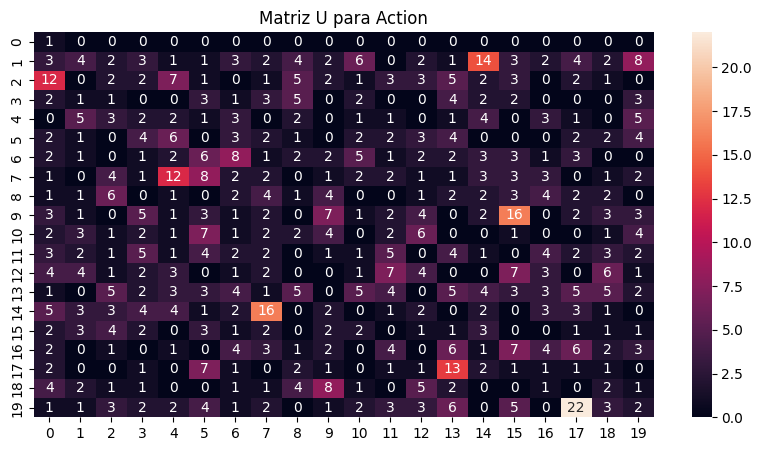

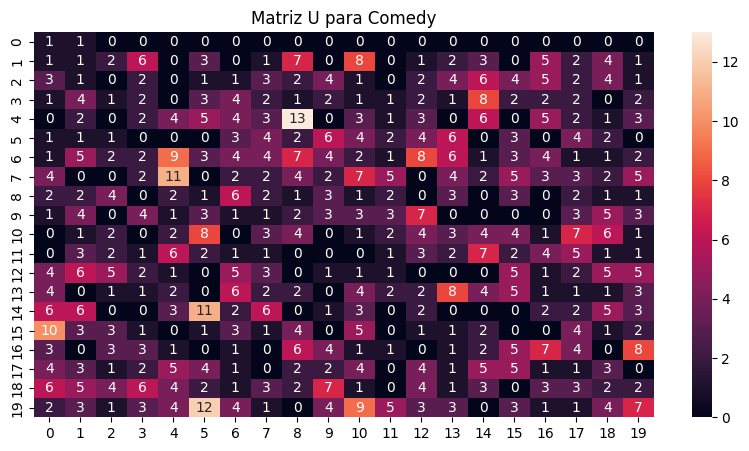

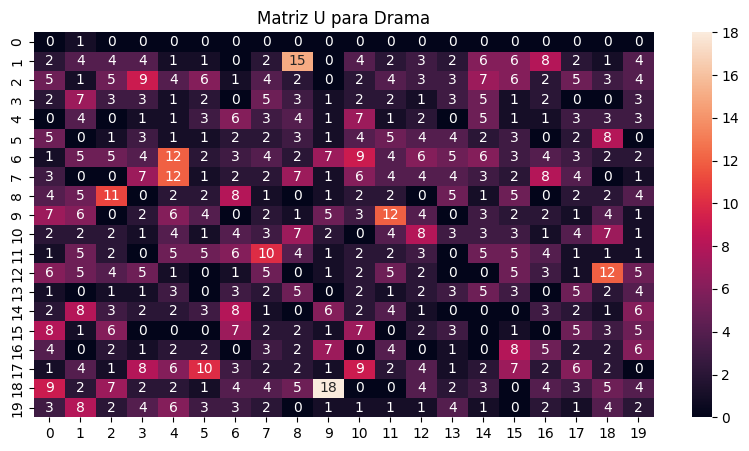

In [ ]:
#Copia
datos_c = datos_5.copy()

# Filtrar el DataFrame por los géneros deseados
generos_deseados = ['Action', 'Comedy', 'Drama']
datos_c = datos_c[datos_c['genres'].isin(generos_deseados)]

# Dejar solo las columnas de las variables
variables = ['budget', 'revenue', 'popularity', 'genres']
datos_c = datos_c[variables].reset_index(drop=True)

# Estandarización de los datos
for variable in ['budget', 'revenue', 'popularity']:
  datos_c[variable] = (datos_c[variable] - datos_c[variable].mean()) / datos_c[variable].std()

k = 20

matrices_neuronas = []

matriz_aux = np.zeros((k, k))

for numero in range(k*k):
  # Calcular las coordenadas (fila, columna)
  fila = numero // k
  columna = numero % k
  # Asignar el número a la posición en la matriz
  matriz_aux[fila, columna] = numero

for genero in generos_deseados:

  datos_analizar = datos_c[datos_c['genres'] == genero]
  datos_analizar_1 = datos_analizar.drop('genres', axis=1).reset_index(drop=True)
  #print(datos_analizar_1)

  datos_entrenamiento = agrupar_datos_entrenamiento(datos_analizar_1, w_2d_c)
  neurona_asignada = datos_entrenamiento.loc[:,'neurona_asignada'].tolist()

  neuronas = np.zeros((k,k))
  for i in range(k):
    for j in range(k):
      elemento = matriz_aux[i,j]
      veces = neurona_asignada.count(elemento)
      neuronas[i,j] = veces

  matrices_neuronas.append(neuronas)
  # Mostrar la matriz U
  plt.figure(figsize=(10, 5))
  sns.heatmap(neuronas, annot=True)
  plt.title(f'Matriz U para {genero}')
  plt.show()

In [ ]:
def matrizClasesRK(clases, neuronas_clase):
  # Inicializar la matriz de clases
  matriz_clases = np.zeros((k, k))

  # Recorrer todas las neuronas
  for i in range(k):
    for j in range(k):
      activaciones = [neuronas_clase[clase][i, j] for clase in clases]
      max_clase = clases[np.argmax(activaciones)]

      # Asignar la clase correspondiente a la mayor activación a la neurona
      matriz_clases[i, j] = clases.index(max_clase)

  return matriz_clases

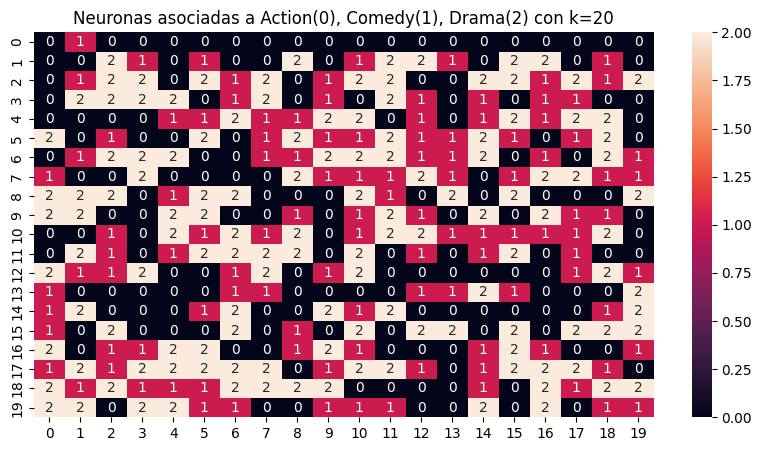

In [ ]:
neuronas_action = matrices_neuronas[0]
neuronas_comedy = matrices_neuronas[1]
neuronas_drama = matrices_neuronas[2]

# Mapeo de neuronas asociadas a cada género
neuronas_clase = {
    'Action': neuronas_action,
    'Comedy': neuronas_comedy,
    'Drama': neuronas_drama
}

k=20
matriz_clases_RK = matrizClasesRK(generos_deseados, neuronas_clase)

plt.figure(figsize=(10, 5))
sns.heatmap(matriz_clases_RK, annot=True)
plt.title(f"Neuronas asociadas a Action(0), Comedy(1), Drama(2) con k={k}")
plt.show()

In [ ]:
def clasificador_RK(datos,k,matriz_clases,variables,pesos):
  clases = np.zeros(len(datos))
  contadores = np.zeros((k, k))

  puntos = datos[variables].values
  distancias = np.zeros((len(datos), k, k))

  for i in range(k):
    for j in range(k):
      distancias[:, i, j] = np.linalg.norm(puntos - pesos[i, j], axis=1)

  neuronas_ganadoras = np.unravel_index(np.argmin(distancias.reshape(len(datos), -1), axis=1), (k, k))
  contadores[neuronas_ganadoras] += 1

  absoluta_neuronas = matriz_clases[neuronas_ganadoras]
  clases[np.where(absoluta_neuronas == 1)] = 1
  clases[np.where(absoluta_neuronas == 2)] = 2

  prediccion = [int(x) for x in clases]

  return prediccion

In [ ]:
k = 20
prediccion_rk = clasificador_RK(datos_c, k, matriz_clases_RK, ['budget','revenue','popularity'], w_3d_c)
datos_RK_c['genres'] = datos_c['genres'].replace(['Action','Comedy','Drama'], [0,1,2])
datos_RK_c['clases'] = prediccion_rk

In [ ]:
datos_RK_c

budget   revenue  popularity  genres  clases
0    -0.340187  0.043746   -0.808175       1       1
1     0.907110  0.803031    1.601508       0       0
2     0.198419 -0.078775   -0.573110       0       1
3     0.963805  0.233074   -0.386909       1       1
4     1.984321 -0.468021   -0.221408       0       0
...        ...       ...         ...     ...     ...
2977  0.623634 -0.060408    4.303161       1       2
2978 -0.481925  0.783927    5.519902       0       2
2979 -0.453578 -0.403668   -1.242625       0       0
2980 -0.771072 -0.530268   -1.314670       1       2
2981 -0.652011 -0.529663   -1.462564       0       2

[2982 rows x 5 columns]

### Gráfico

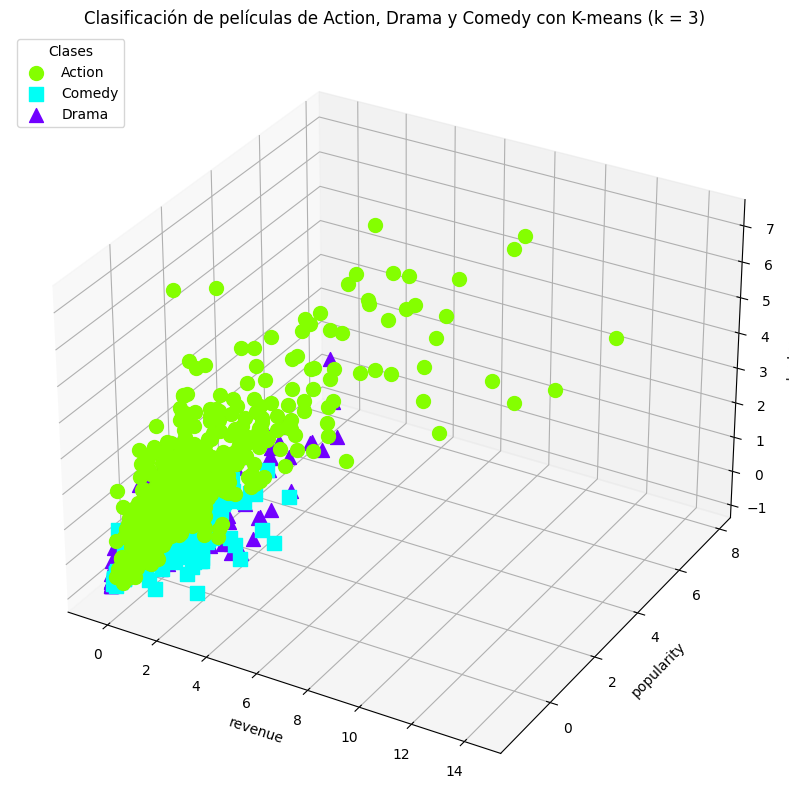

In [ ]:
k = 3

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos en 'genres'
unique_genres = range(0, k)
genres_names = ['Action', 'Comedy', 'Drama']

# Definir una paleta de colores personalizada con una mayor cantidad de colores
custom_palette = sns.color_palette("hsv", len(unique_genres))

# Definir una lista de marcadores para cada clase
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X', 'h', '8', '>', '<', 'd', 'H', 'P', 'o', 's', '^', 'D', 'v']

# Asignar manualmente las etiquetas, colores y marcadores a los puntos en el gráfico de dispersión
for i, genre in enumerate(unique_genres):
    indices = datos_RK_c['clases'] == genre
    ax.scatter(
        datos_RK_c.loc[indices, 'revenue'],
        datos_RK_c.loc[indices, 'popularity'],
        datos_RK_c.loc[indices, 'budget'],
        zdir='z',
        s=100,  # Cambiar el tamaño de los puntos
        marker=markers[i],  # Cambiar la forma de los puntos según la clase
        c=custom_palette[i],
        label=genres_names[genre],
        depthshade=False
    )

# Mostrar la leyenda con los colores y nombres de género
ax.legend(loc="upper left", title="Clases")
ax.set_xlabel('revenue')
ax.set_ylabel('popularity')
ax.set_zlabel('budget')
ax.set_title(f'Clasificación de películas de Action, Drama y Comedy con K-means (k = {k})')
plt.show()

## K-means

### Método del codo

In [ ]:
def ejecutarKmeans(datos_5, k):
  #Copia
  datos_KM_c = datos_5.copy()

  # Filtrar el DataFrame por los géneros deseados
  generos_deseados = ['Action', 'Drama', 'Comedy']
  datos_KM_c = datos_KM_c[datos_KM_c['genres'].isin(generos_deseados)]

  # Dejar solo las columnas de las variables
  variables = ['budget', 'revenue', 'popularity']
  datos_KM_c = datos_KM_c[variables].reset_index(drop=True)

  # Estandarización de los datos
  for variable in variables:
    datos_KM_c[variable] = (datos_KM_c[variable] - datos_KM_c[variable].mean()) / datos_KM_c[variable].std()

  datos_KM_c_final, suma_distancias = kmeans(datos_KM_c, k, variables)

  return datos_KM_c_final, suma_distancias

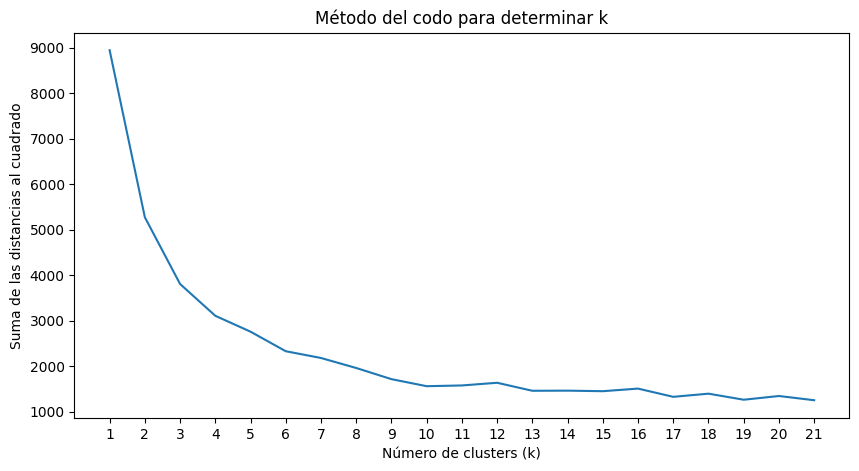

In [ ]:
k_valores = range(1, 22)
sumas = []

for k in k_valores:
  datos_KM_c_final, suma_distancias = ejecutarKmeans(datos_5, k)
  sumas.append(suma_distancias)

plt.figure(figsize=(10, 5))
plt.plot(k_valores, sumas)
plt.xticks(k_valores)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Suma de las distancias al cuadrado")
plt.title("Método del codo para determinar k")
plt.show()

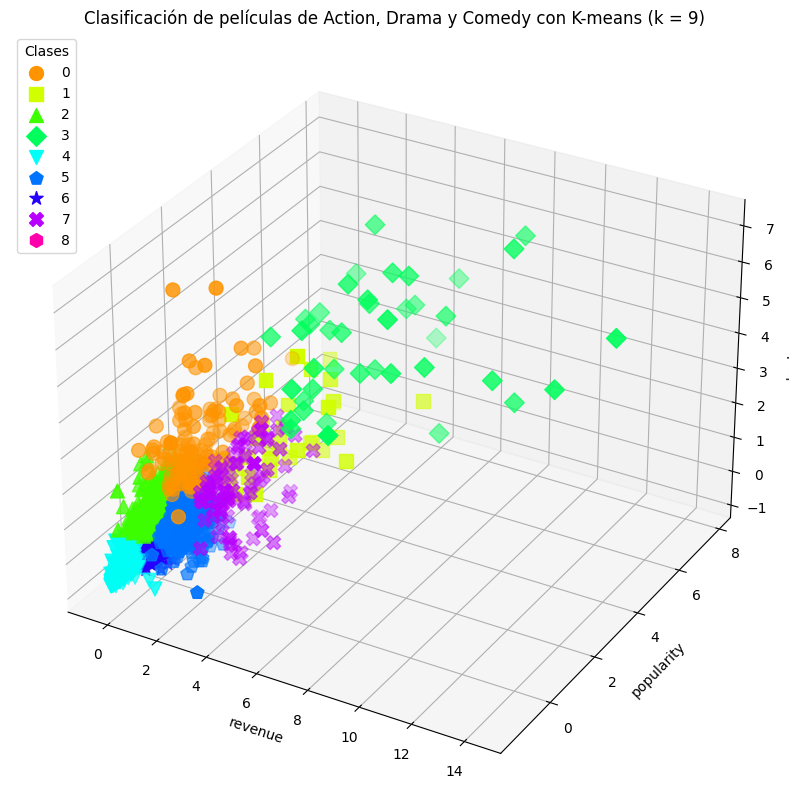

In [ ]:
k = 9

datos_KM_c_final, suma_distancias = ejecutarKmeans(datos_5, k)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos en 'genres'
unique_genres = range(0, k)

# Definir una paleta de colores personalizada con una mayor cantidad de colores
custom_palette = sns.color_palette("hsv", len(unique_genres))

# Definir una lista de marcadores para cada clase
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X', 'h', '8', '>', '<', 'd', 'H', 'P', 'o', 's', '^', 'D', 'v']

# Asignar manualmente las etiquetas, colores y marcadores a los puntos en el gráfico de dispersión
for i, genre in enumerate(unique_genres):
    indices = datos_KM_c_final['clases'] == genre
    ax.scatter(
        datos_KM_c_final.loc[indices, 'revenue'],
        datos_KM_c_final.loc[indices, 'popularity'],
        datos_KM_c_final.loc[indices, 'budget'],
        zdir='z',
        s=100,  # Cambiar el tamaño de los puntos
        marker=markers[i],  # Cambiar la forma de los puntos según la clase
        c=custom_palette[i],
        label=genre,
        depthshade=True
    )

# Mostrar la leyenda con los colores y nombres de género
ax.legend(loc="upper left", title="Clases")
ax.set_xlabel('revenue')
ax.set_ylabel('popularity')
ax.set_zlabel('budget')
ax.set_title(f'Clasificación de películas de Action, Drama y Comedy con K-means (k = {k})')
plt.show()

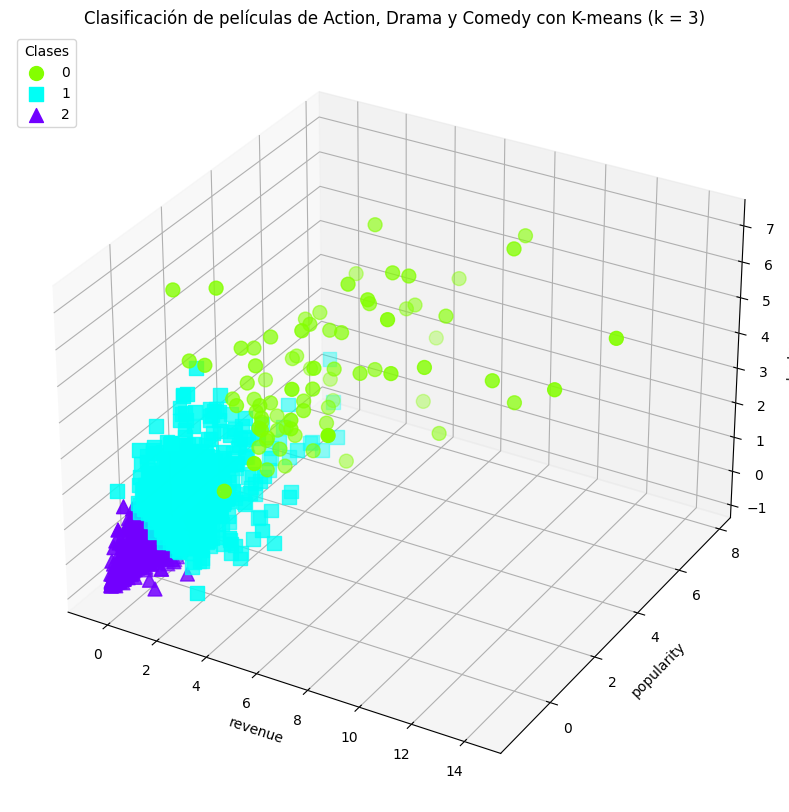

In [ ]:
k = 3

datos_KM_c_final, suma_distancias = ejecutarKmeans(datos_5, k)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos en 'genres'
unique_genres = range(0, k)

# Definir una paleta de colores personalizada con una mayor cantidad de colores
custom_palette = sns.color_palette("hsv", len(unique_genres))

# Definir una lista de marcadores para cada clase
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X', 'h', '8', '>', '<', 'd', 'H', 'P', 'o', 's', '^', 'D', 'v']

# Asignar manualmente las etiquetas, colores y marcadores a los puntos en el gráfico de dispersión
for i, genre in enumerate(unique_genres):
    indices = datos_KM_c_final['clases'] == genre
    ax.scatter(
        datos_KM_c_final.loc[indices, 'revenue'],
        datos_KM_c_final.loc[indices, 'popularity'],
        datos_KM_c_final.loc[indices, 'budget'],
        zdir='z',
        s=100,  # Cambiar el tamaño de los puntos
        marker=markers[i],  # Cambiar la forma de los puntos según la clase
        c=custom_palette[i],
        label=genre,
        depthshade=True
    )

# Mostrar la leyenda con los colores y nombres de género
ax.legend(loc="upper left", title="Clases")
ax.set_xlabel('revenue')
ax.set_ylabel('popularity')
ax.set_zlabel('budget')
ax.set_title(f'Clasificación de películas de Action, Drama y Comedy con K-means (k = {k})')
plt.show()

## Agrupamiento jerárquico

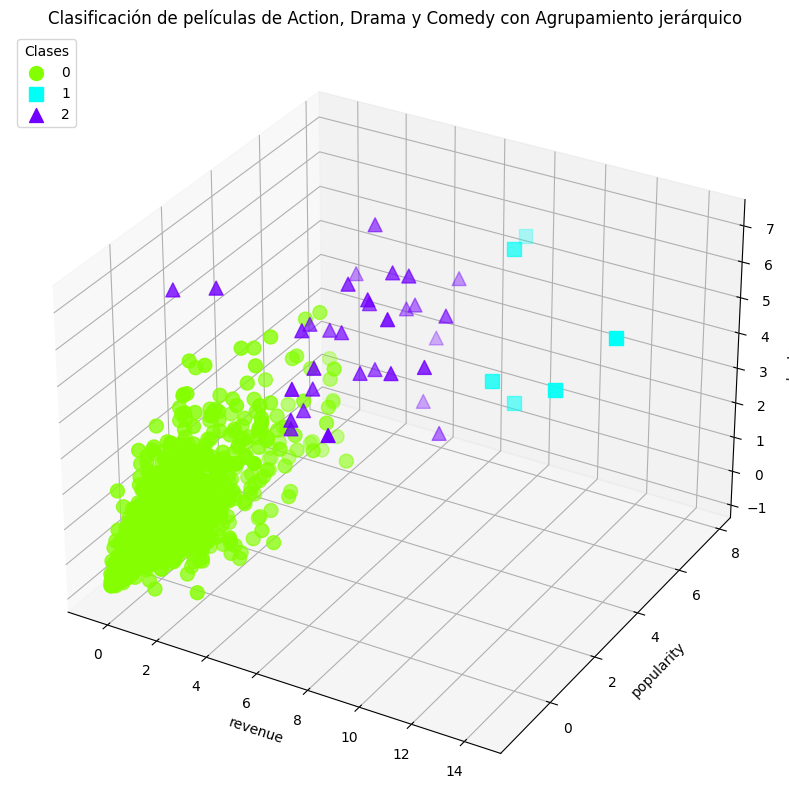

In [ ]:
#Copia
datos_AJ_c = datos_5.copy()

# Filtrar el DataFrame por los géneros deseados
generos_deseados = ['Action', 'Drama', 'Comedy']
datos_AJ_c = datos_AJ_c[datos_AJ_c['genres'].isin(generos_deseados)]

# Dejar solo las columnas de las variables
variables = ['budget', 'revenue', 'popularity']
datos_AJ_c = datos_AJ_c[variables].reset_index(drop=True)

# Estandarización de los datos
for variable in variables:
  datos_AJ_c[variable] = (datos_AJ_c[variable] - datos_AJ_c[variable].mean()) / datos_AJ_c[variable].std()

matriz_AJ_c, grupos_AJ_c = agrupamientoJerarquico(datos_AJ_c) # Tarda 4 minutos aprox.

k= 3
clases_AJ_c = fcluster(matriz_AJ_c, k, criterion='maxclust')
datos_AJ_c["clases"] = clases_AJ_c

datos_AJ_c['clases'] = datos_AJ_c['clases'].replace([1,2,3], [0,1,2])

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores únicos en 'genres'
unique_genres = range(0, k)

# Definir una paleta de colores personalizada con una mayor cantidad de colores
custom_palette = sns.color_palette("hsv", len(unique_genres))

# Definir una lista de marcadores para cada clase
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X', 'h', '8', '>', '<', 'd', 'H', 'P', 'o', 's', '^', 'D', 'v']

# Asignar manualmente las etiquetas, colores y marcadores a los puntos en el gráfico de dispersión
for i, genre in enumerate(unique_genres):
  indices = datos_AJ_c['clases'] == genre
  ax.scatter(
    datos_AJ_c.loc[indices, 'revenue'],
    datos_AJ_c.loc[indices, 'popularity'],
    datos_AJ_c.loc[indices, 'budget'],
    zdir='z',
    s=100,  # Cambiar el tamaño de los puntos
    marker=markers[i],  # Cambiar la forma de los puntos según la clase
    c=custom_palette[i],
    label=genre,
    depthshade=True
  )

# Mostrar la leyenda con los colores y nombres de género
ax.legend(loc="upper left", title="Clases")
ax.set_xlabel('revenue')
ax.set_ylabel('popularity')
ax.set_zlabel('budget')
ax.set_title('Clasificación de películas de Action, Drama y Comedy con Agrupamiento jerárquico')
plt.show()

## Evaluación del modelo

### Código

#### Matriz de confusión del modelo

In [ ]:
def calcularMatrizConfusion(df, combinacion):

  array_pred=np.array(df["clases"])
  array_real=np.array(df["genres"])
  k=len(combinacion)

  metricas_categorias = {}
  for i in range(k):
    entrada_principal = str(i)  # Convertir el valor a cadena
    metricas_categorias[entrada_principal] = {}  # Crear una entrada vacía para cada valor principal
    for j in range(k):
      entrada_secundaria = entrada_principal + str(j)  # Concatenar el valor principal con el valor secundario
      metricas_categorias[entrada_principal][entrada_secundaria] = 0  # Asignar un valor inicial a cada entrada secundaria

  for i in range(len(array_pred)):
    # Obtiene el codigo --> la posición en la matriz
    codigo =  str(array_real[i]) + str(array_pred[i])
    metricas_categorias[str(array_real[i])][codigo] += 1

  matriz_confusion = np.zeros((k,k))

  for i in range(k):
    for j in range(k):
      codigo = str(i) + str(j)
      matriz_confusion[i-1, j-1] = metricas_categorias[str(i)][codigo]

  matriz_confusion_n = np.round(matriz_confusion.astype('float') / (matriz_confusion.sum(axis=1)[:, np.newaxis]), decimals = 3)

  plt.figure()
  # Graficar matriz como heatmap para que quede con los colores
  sns.heatmap(matriz_confusion_n, annot=True, fmt='g', xticklabels=list(range(k)), yticklabels=list(range(k)), cmap="crest")
  plt.title(f"Matriz de confusión combinacion {combinacion}")
  plt.xlabel("Predicciones")
  plt.ylabel("Verdaderas")
  plt.show()

  return

#### Matrices de confusión por categoría

In [ ]:
def matrices_confusion(df, combinacion):

  clasificacion_datos, categorias_datos = np.array(df["clases"]), np.array(df["genres"])
  k=len(combinacion)
  categorias = list(range(k))
  categorias=[str(numero) for numero in range(k)]
  lista_vp=['VP','VN','FP','FN','Total']

  # Se crea un diccionario de diccionarios, donde cada clave es una categoria y su valor es un diccionario,
  # que contiene las cantidades de VP, VN, FP, FN y total
  # total es la cantidad de pixels que realmente corresponden a dicha categoria.
  P_N_categorias = {}
  for i in range(k):
    entrada_principal = str(i)  # Convertir el valor a cadena
    P_N_categorias[entrada_principal] = {}  # Crear una entrada vacía para cada valor principal
    for entrada_secundaria in lista_vp:
      P_N_categorias[entrada_principal][entrada_secundaria] = 0  # Asignar un valor inicial a cada entrada secundaria

  for categoria in categorias: # Para cada categoria de las analizadas

    # Calcular VP --> clasificacion (predicho) == categoria (real)
    VP = 0
    for i in range(len(categorias_datos)):
      if ((int(categoria) == categorias_datos[i]) and (clasificacion_datos[i] == categorias_datos[i])):
        # El dato se guarda si se cumple que es VP y ademas si la categoria que se está analizando es igual a la del pixel
        VP += 1
    diccionario_categoria = P_N_categorias[categoria]
    diccionario_categoria["VP"] = VP # Se guarda en el diccionario de la categoria la cantidad de VP contados en el DF de entrenamiento

    # Calcular FP --> aquellos pixels que fueron clasificados en la categoria analizada pero en realidad no pertenecen a ella
    FP = 0
    for i in range(len(categorias_datos)):
      if  ((clasificacion_datos[i] == int(categoria)) and (categorias_datos[i] != int(categoria))):
        # Se suma uno a la cantidad de FP si la clasificacion del pixel es igual a la categoria analizada
        # y si la categoria real del pixel es distinta a la categoria analizada
        FP += 1
    diccionario_categoria = P_N_categorias[categoria]
    diccionario_categoria["FP"] = FP

    # Calcular VN --> aquellos pixels cuya categoria real es distinta a la analizada y que fueron clasificados con la categoria distinta a la analizada (ya sea correctamente o no)
    VN = 0
    for i in range(len(categorias_datos)):
      if (((int(categoria) != categorias_datos[i]) and (clasificacion_datos[i] != categorias_datos[i]) and (int(categoria) != clasificacion_datos[i])) or ((int(categoria) != clasificacion_datos[i]) and (clasificacion_datos[i] == categorias_datos[i]))):
        # Se suma uno si la categoria analizada es distinta a la categoria real del pixel y si la clasificacion es distinta a la categoria real
        # y si además la categoria analizada es distinta a la clasificacion del pixel.
        # O puede ocurrir que la categoria analizada sea distinta a la categoria real del pixel y se clasificó correctamente
        VN += 1
    diccionario_categoria = P_N_categorias[categoria]
    diccionario_categoria["VN"] = VN

    # Calcular FN --> aquellos pixels cuya categoria real es igual a la analizada pero fueron incorrectamente clasificados
    FN = 0
    for i in range(len(categorias_datos)):
      if (categorias_datos[i] == int(categoria)) and (clasificacion_datos[i] != categorias_datos[i]):
        # Se suma uno si la categoria real del pixel es igual a la analizada y si la clasificacion es distinta a la categoria real
        FN += 1
    diccionario_categoria = P_N_categorias[categoria]
    diccionario_categoria["FN"] = FN

    # Calcular total --> se suman todos los titulares cuya categoria real es igual a la analizada
    total = 0
    for i in range(len(categorias_datos)):
      if (categorias_datos[i] == int(categoria)):
        total += 1
    diccionario_categoria = P_N_categorias[categoria]
    diccionario_categoria["total"] = total

  # Matrices de confusion por categoria

  matriz_confusion = np.zeros((2, 2)) # Matriz de 2x2 con ceros

  for i in range(len(categorias)): # Para cada categoria se guardan los datos correspondientes para obtener una matriz de confusión
    matriz_confusion[0, 0] = P_N_categorias[categorias[i]]['VP']
    matriz_confusion[0, 1] = P_N_categorias[categorias[i]]['FN']
    matriz_confusion[1, 0] = P_N_categorias[categorias[i]]['FP']
    matriz_confusion[1, 1] = P_N_categorias[categorias[i]]['VN']

    # Normalizacion de la matriz de confusion
    matriz_confusion_n = np.round(matriz_confusion.astype('float') / matriz_confusion.sum(axis=1)[:, np.newaxis], decimals=3)

    plt.figure()
    # Graficar matriz como heatmap para que quede con los colores
    sns.heatmap(matriz_confusion_n, annot=True, fmt='g', xticklabels=['P', 'N'], yticklabels=['P', 'N'], cmap="crest")
    plt.title(f"Matriz de confusión combinación: {combinacion} para categoría {categorias[i]}")
    plt.xlabel("Predicciones")
    plt.ylabel("Verdaderas")
    plt.show()

  return P_N_categorias

#### Precisión clasificador

In [ ]:
def precisionClasificador(P_N_categorias):
  VP_total = 0
  VN_total = 0
  FP_total = 0
  FN_total = 0

  for clase in P_N_categorias:
    for metrica in P_N_categorias[clase]:
      if metrica == 'VP':
        VP_total += P_N_categorias[clase][metrica]
      elif metrica == 'VN':
        VN_total += P_N_categorias[clase][metrica]
      elif metrica == 'FP':
        FP_total += P_N_categorias[clase][metrica]
      elif metrica == 'FN':
        FN_total += P_N_categorias[clase][metrica]

  #accuracy = (VP_total + VN_total) / (VP_total + VN_total + FP_total + FN_total)
  precision = VP_total / (VP_total + FP_total)
  #recall = VP_total / (VP_total + FN_total)
  #metricas = [accuracy, precision, recall]

  return precision

#### Métricas

In [ ]:
def metricas(df_clasificado,generos_deseados):

  k = len(generos_deseados)
  clases=list(range(k))
  combinaciones = list(itertools.permutations(clases))
  #print(df_clasificado)
  for combinacion in combinaciones: #vamos variando la clase que le asignamos a cada genero
    df_clasificado_copy = df_clasificado.copy()
    df_clasificado_copy['genres'] = df_clasificado_copy['genres'].replace(generos_deseados, combinacion)
    calcularMatrizConfusion(df_clasificado_copy, combinacion)
    mat=matrices_confusion(df_clasificado_copy, combinacion)
    precision_clasif=precisionClasificador(mat)
    print(f'Precisión del clasificador para la combinación {combinacion}: {np.round(precision_clasif,2)}')

  return

### Redes de Kohonen

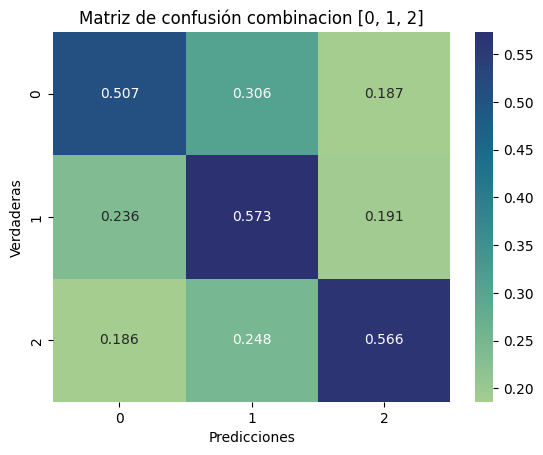

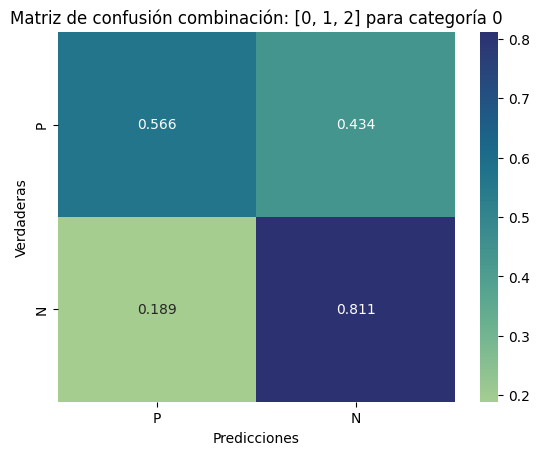

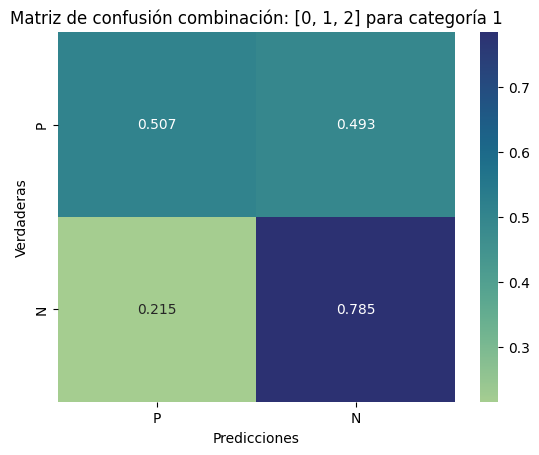

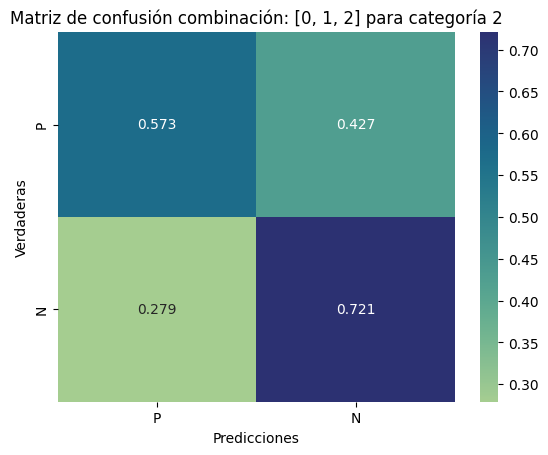

Precisión del clasificador: 0.55


In [ ]:
#Copia
datos_aux = datos_5.copy()

generos_deseados = ['Action', 'Comedy', 'Drama']

# Calcular métricas
k = len(generos_deseados)
calcularMatrizConfusion(datos_RK_c, [0,1,2])
mat = matrices_confusion(datos_RK_c, [0,1,2])
precision_clasif = precisionClasificador(mat)
print(f'Precisión del clasificador: {np.round(precision_clasif,2)}')

### K-means

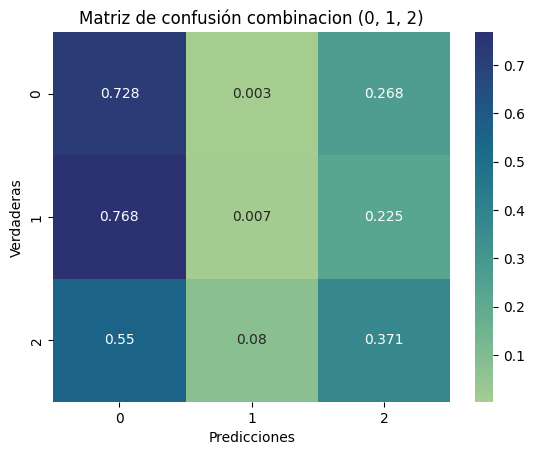

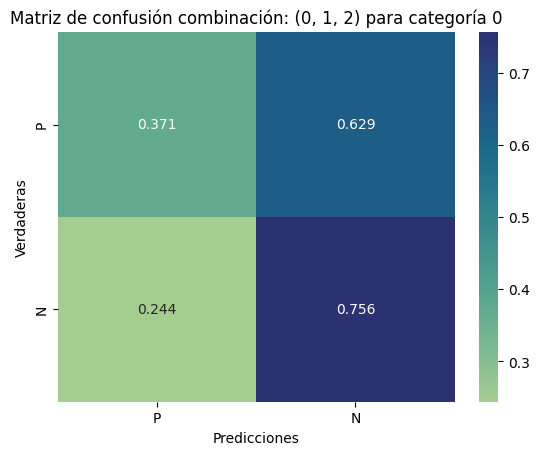

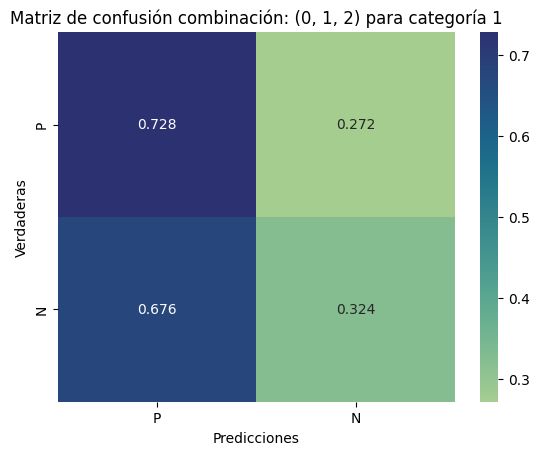

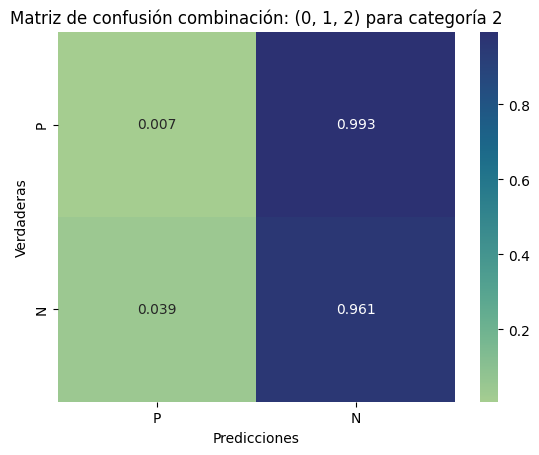

Precisión del clasificador para la combinación (0, 1, 2): 0.34


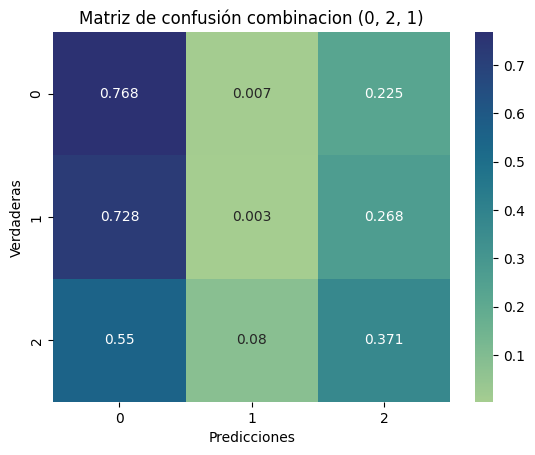

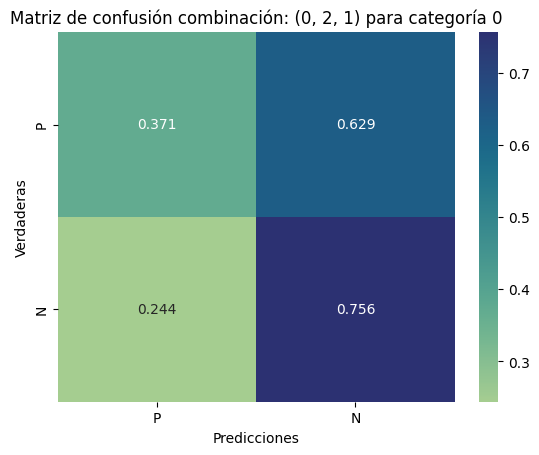

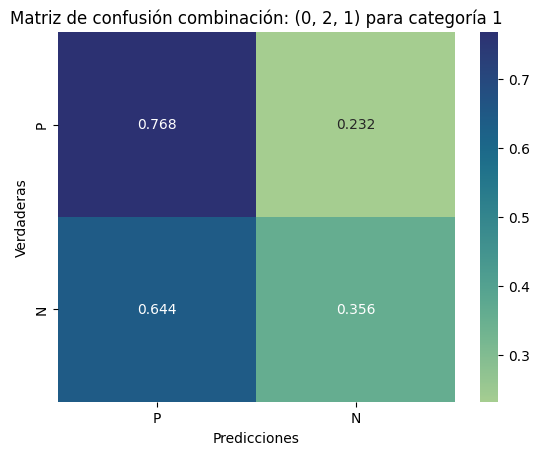

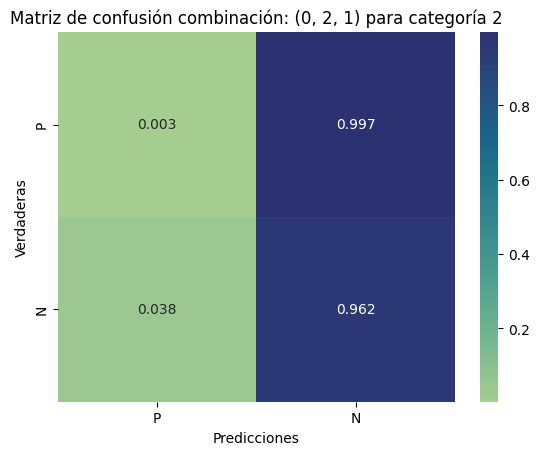

Precisión del clasificador para la combinación (0, 2, 1): 0.41


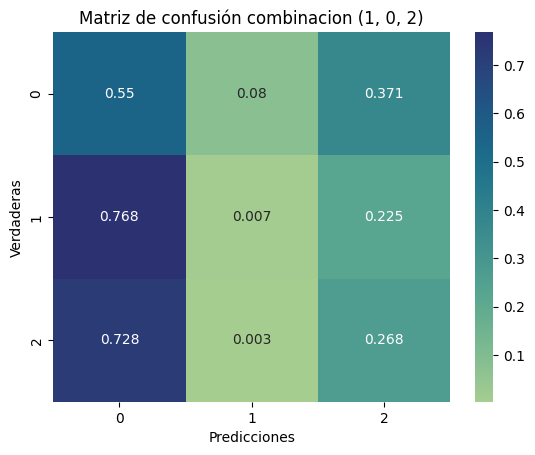

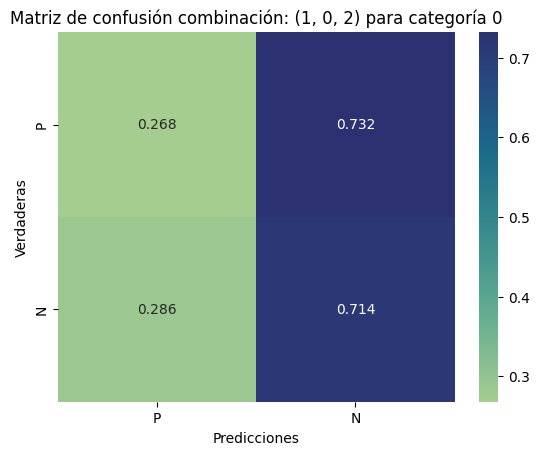

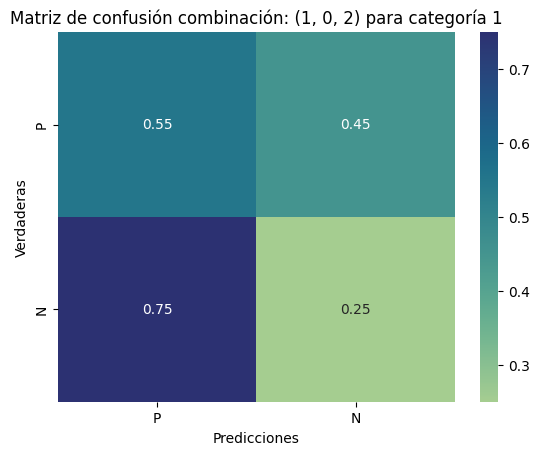

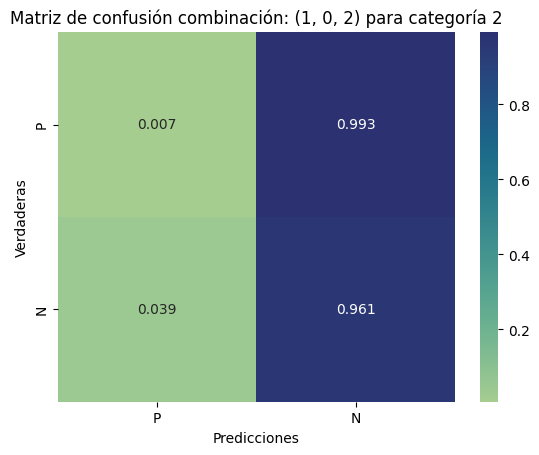

Precisión del clasificador para la combinación (1, 0, 2): 0.25


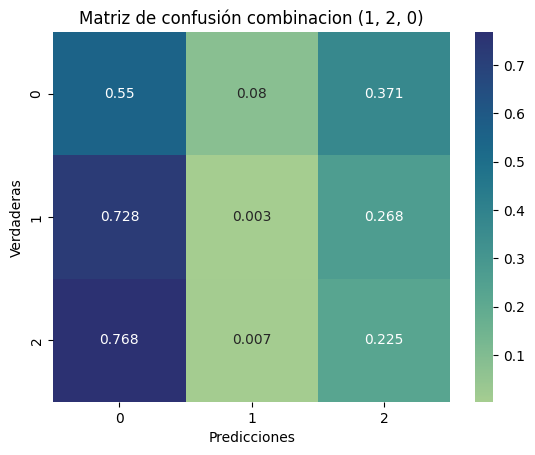

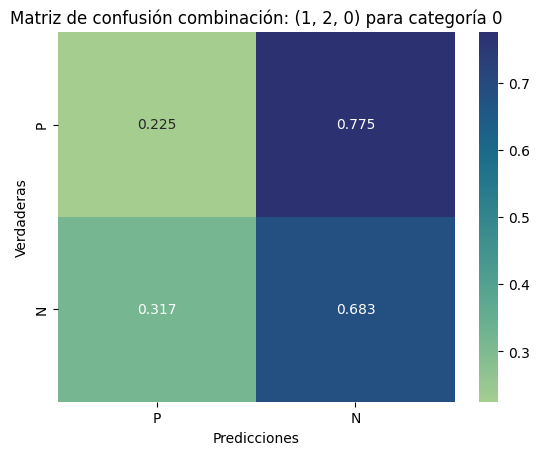

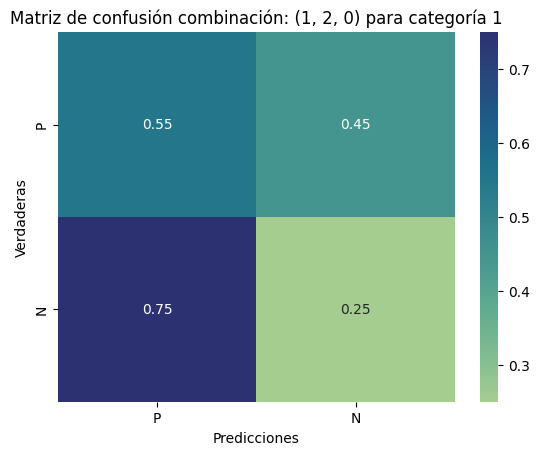

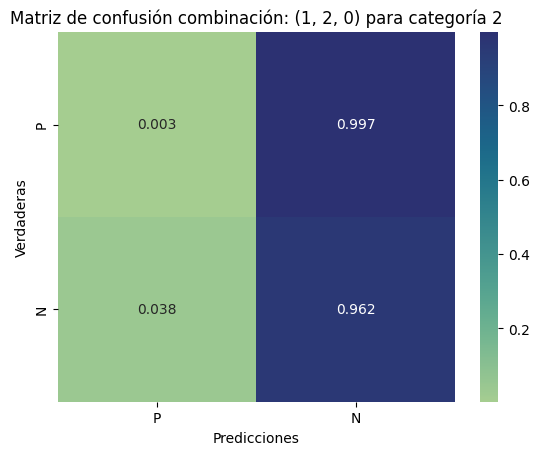

Precisión del clasificador para la combinación (1, 2, 0): 0.25


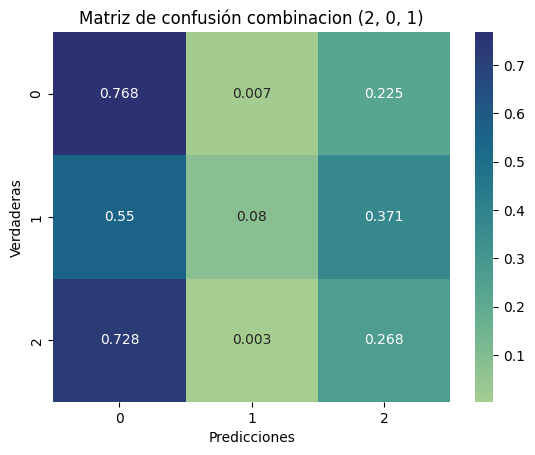

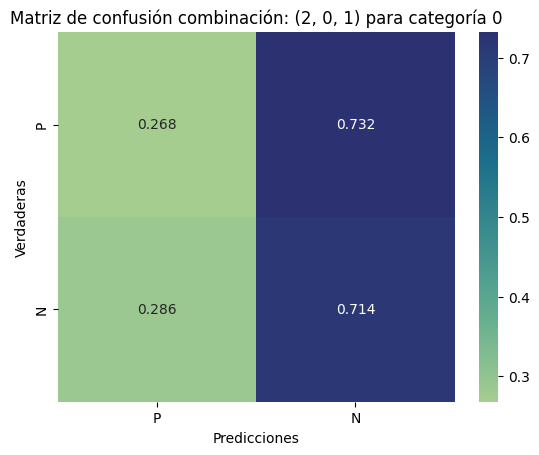

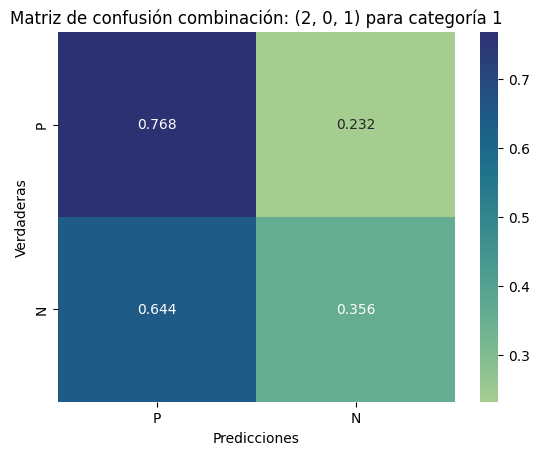

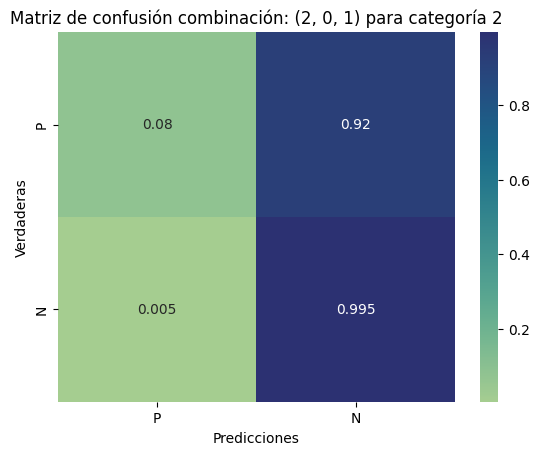

Precisión del clasificador para la combinación (2, 0, 1): 0.41


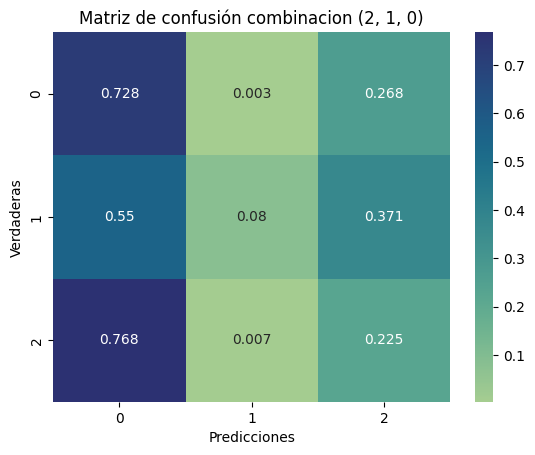

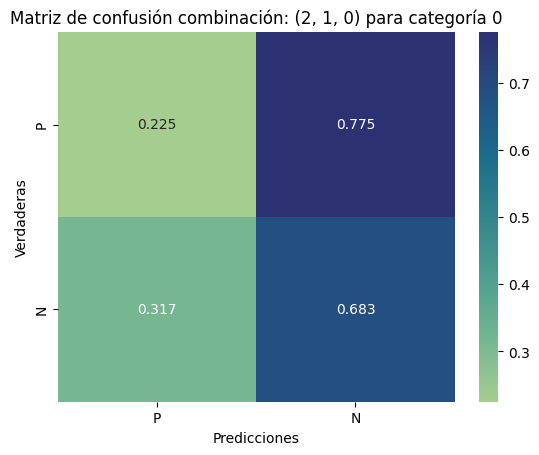

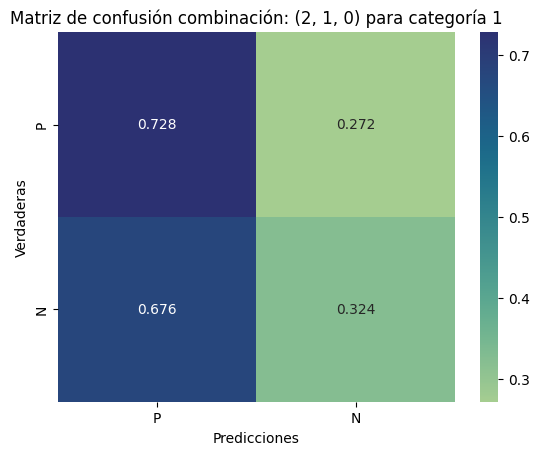

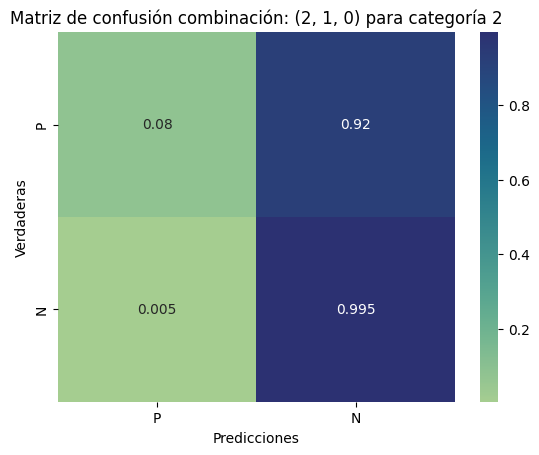

Precisión del clasificador para la combinación (2, 1, 0): 0.35


In [ ]:
#Copia
datos_aux = datos_5.copy()

# Agregar columna de géneros
generos_deseados = ['Action', 'Comedy', 'Drama']
datos_aux = datos_aux[datos_aux['genres'].isin(generos_deseados)].reset_index(drop=True)
datos_KM_c_final['genres'] = datos_aux['genres']

# Calcular métricas
metricas(datos_KM_c_final, generos_deseados)

### Agrupamiento jerárquico

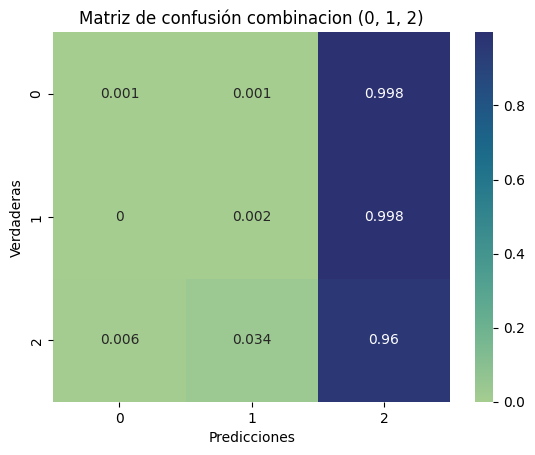

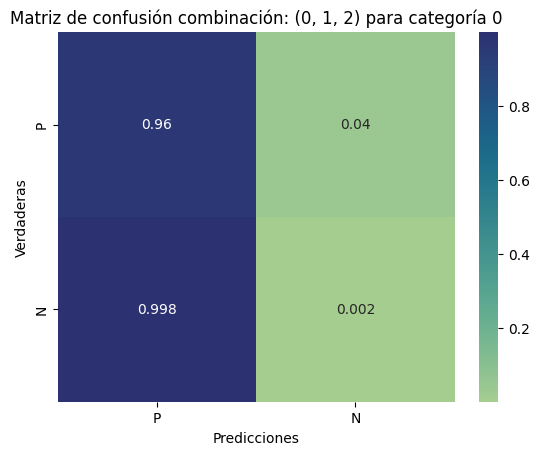

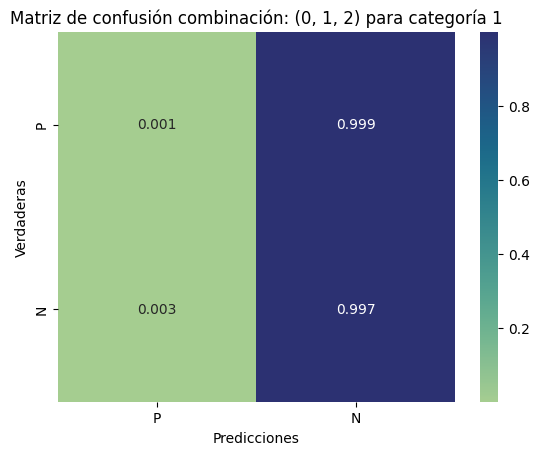

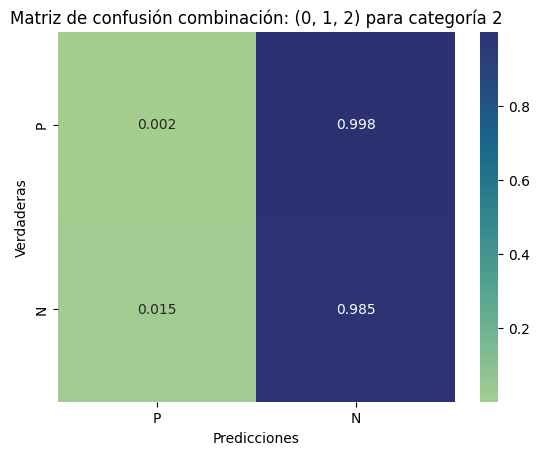

Precisión del clasificador para la combinación (0, 1, 2): 0.28


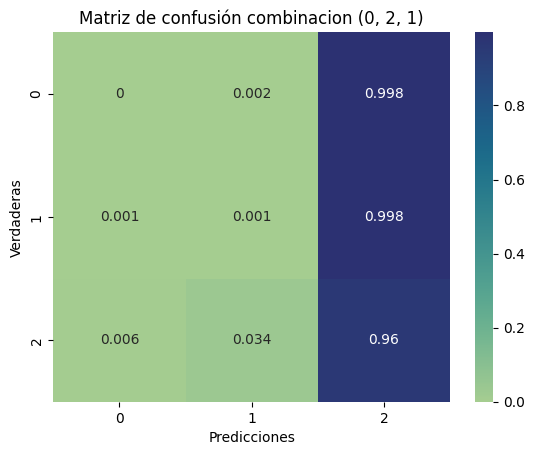

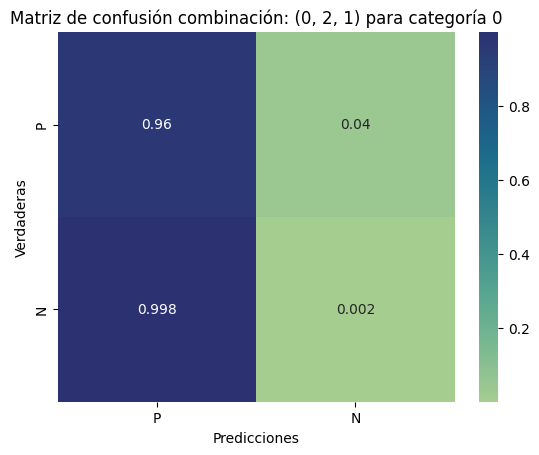

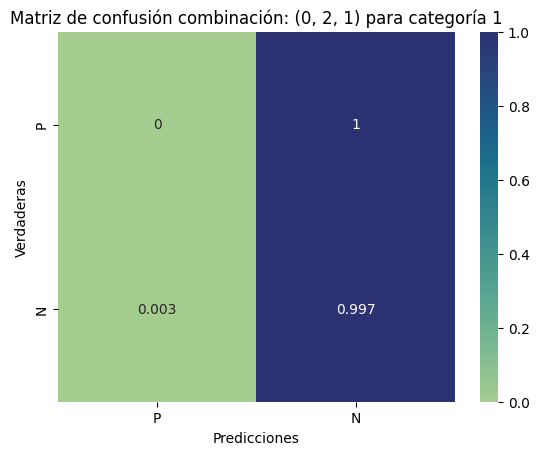

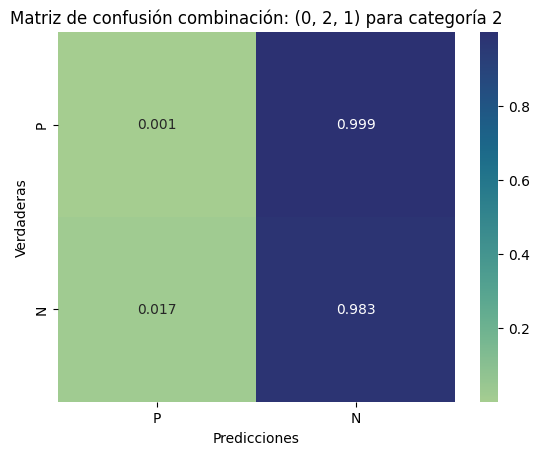

Precisión del clasificador para la combinación (0, 2, 1): 0.28


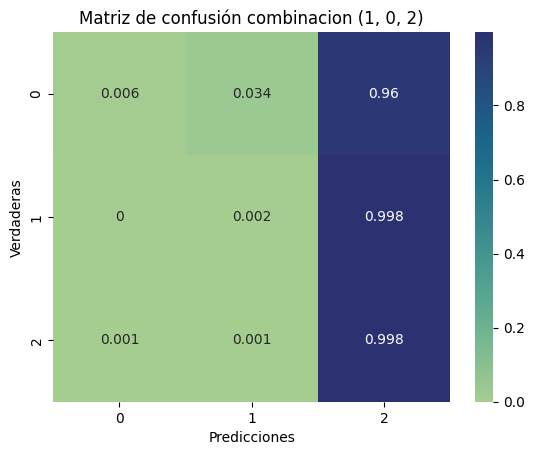

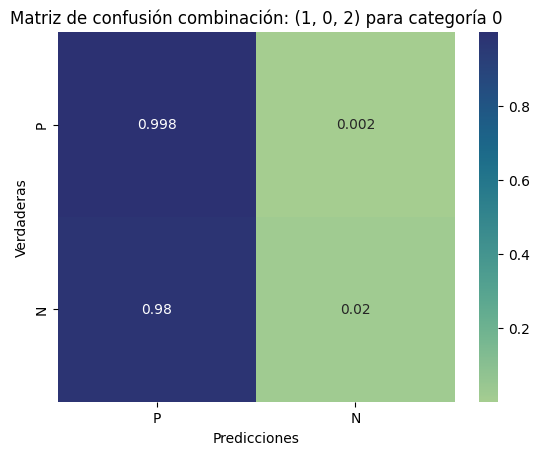

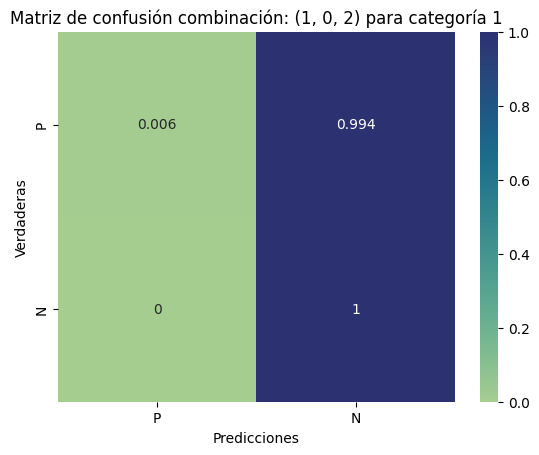

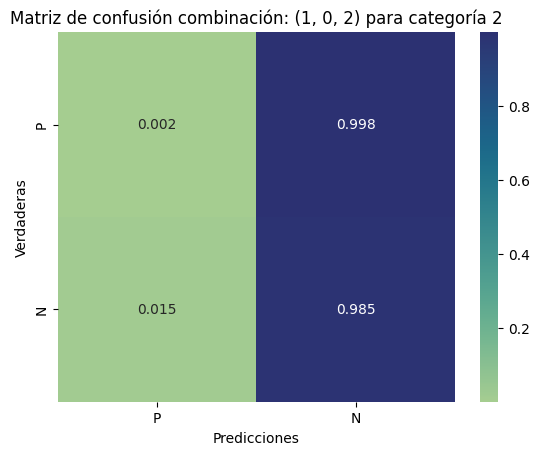

Precisión del clasificador para la combinación (1, 0, 2): 0.39


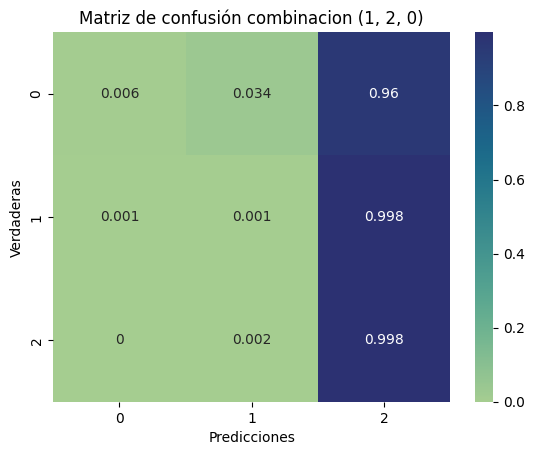

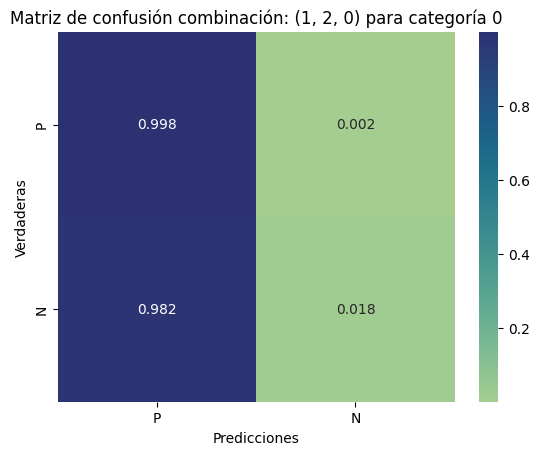

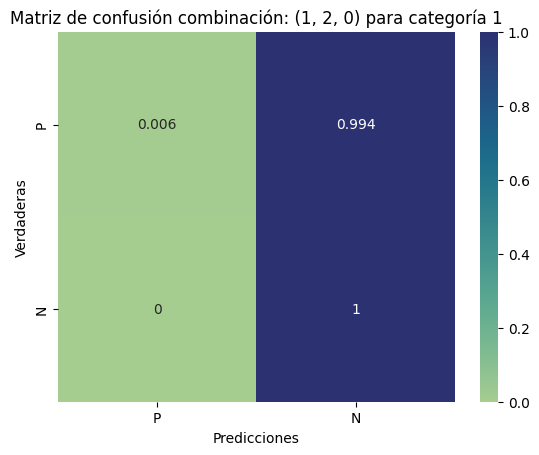

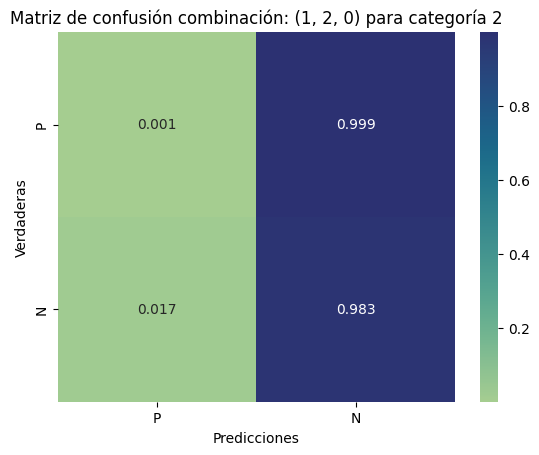

Precisión del clasificador para la combinación (1, 2, 0): 0.32


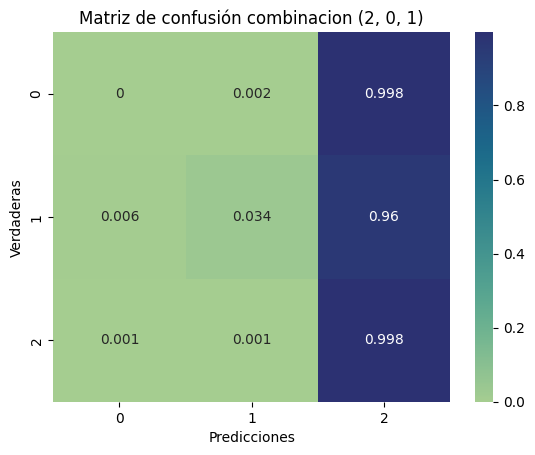

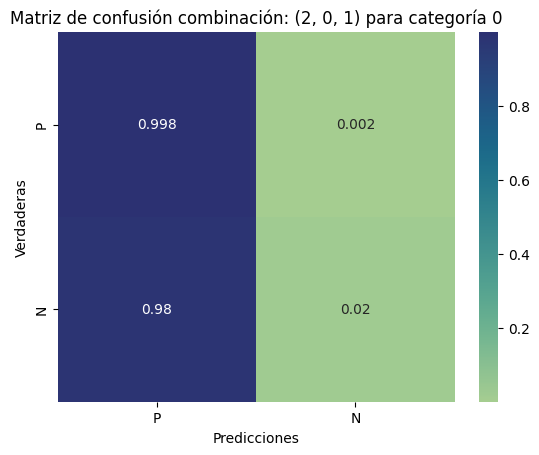

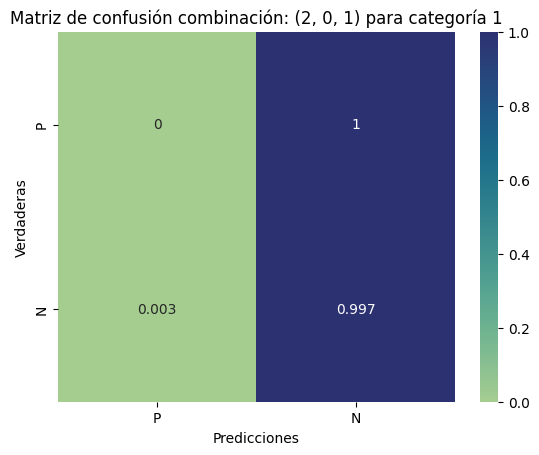

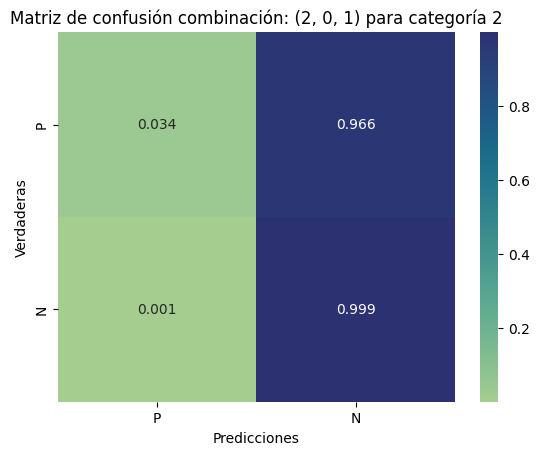

Precisión del clasificador para la combinación (2, 0, 1): 0.4


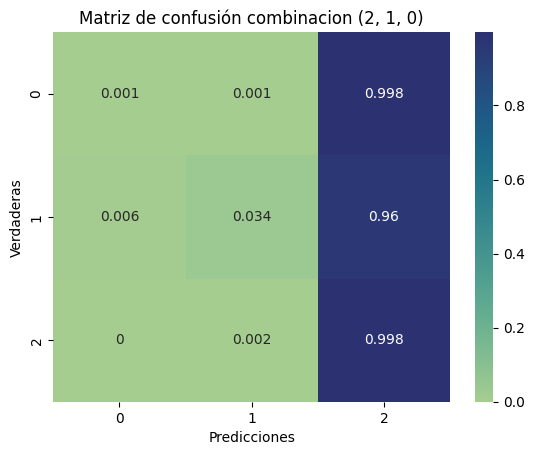

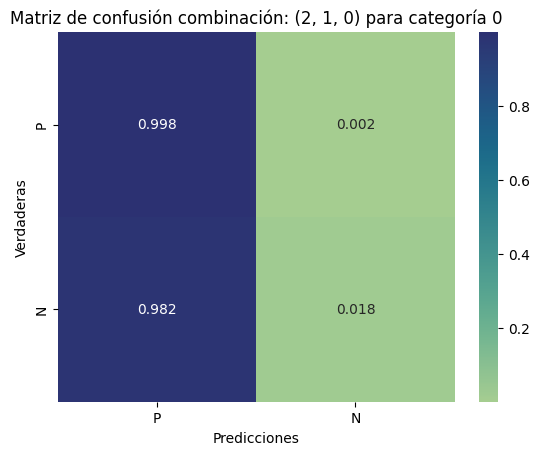

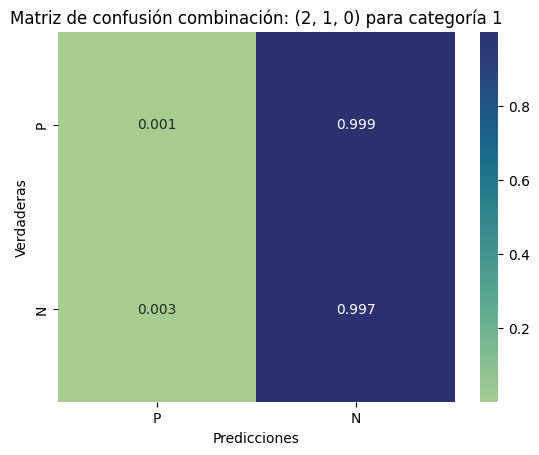

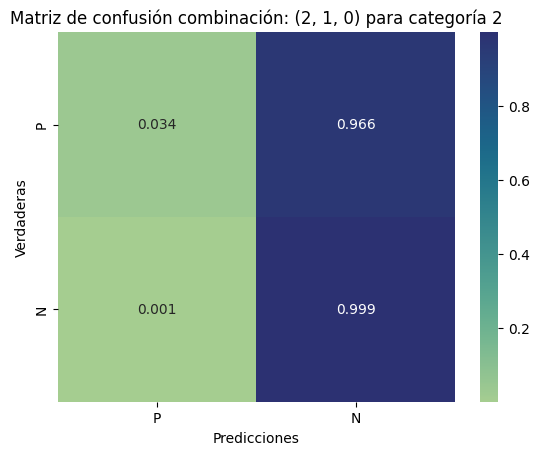

Precisión del clasificador para la combinación (2, 1, 0): 0.33


In [ ]:
#Copia
datos_aux = datos_5.copy()

# Agregar columna de géneros
generos_deseados = ['Action', 'Comedy', 'Drama']
datos_aux = datos_aux[datos_aux['genres'].isin(generos_deseados)].reset_index(drop=True)
datos_AJ_c['genres'] = datos_aux['genres']

# Calcular métricas
metricas(datos_AJ_c, generos_deseados)